# **0. Introduction**

## **Dataset Description**

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Obesity or CVD risk dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

## **Features in Dataset**

**Features**| **Descriptions**
--- | ---
**Gender** | Female or Male
**Age** | Numeric value
**Height** | Numeric value in meters
**Weight** | Numeric value in kilograms
**family_history_with_overweight** | Yes or No
**FAVC** | Do you eat high caloric food frequently?-Yes or No
**FCVC** | Do you usually eat vegetables in your meals?-numeric
**NCP** | How many main meals do you have daily?-numeric
**CAEC** | Do you eat any food between meals?-No, Sometimes, Frequently, Always
**SMOKE** | Yes or No
**CH2O** | How much water do you drink daily?-numeric
**SCC** | Do you monitor the calories you eat daily?-Yes or No
**FAF** | How often do you have physical activity?-numeric
**TUE** | How much time do you use technological devices such as cell phone, videogames, television, computer and others?-numeric
**CALC** | how often do you drink alcohol?-I do not drink, Sometimes, Frequently, Always
**MTRANS** | Which transportation do you usually use?-Automobile, Motorbike, Bike, Public Transportation, Walking
**NObeyesdad** | Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Insufficient_Weight, Obesity_Type_II, Obesity_Type_III

## **Files**

* train.csv - the training dataset; NObeyesdad is the categorical target

* test.csv - the test dataset; your objective is to predict the class of NObeyesdad for each row

* sample_submission.csv - a sample submission file in the correct format


# **1. Load Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = 'white', context = 'notebook', palette = 'deep')

import warnings
warnings.filterwarnings('ignore')

# **2. Load and Check Data**

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bonecar","key":"16e8cf29f7ed598055d79be78b65be57"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c playground-series-s4e2

  0% 0.00/917k [00:00<?, ?B/s]
100% 917k/917k [00:00<00:00, 90.0MB/s]


In [6]:
!unzip playground-series-s4e2.zip

Archive:  playground-series-s4e2.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## **2.1 Train data**

In [7]:
# Load data from csv file
df_train = pd.read_csv('train.csv')

In [8]:
# Print 5 rows of df
df_train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [9]:
# Check data type of columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [10]:
# dataframe shape
df_train.shape

(20758, 18)

 **Data contents:**

* id (not feature)
* Gender
* Age
* Height
* Weight
* family_history_with_overweight
* FAVC
* FCVC
* NCP
* CAEC
* SMOKE
* CH2O
* SCC
* FAF
* TUE
* CALC
* MTRANS
* NObeyesdad(Target labels)

Dataframe have (20758,18) shape and are composed of 16 features and 1 label(NObeyesdad).

8 featrures are num type data and the others (8 feauteres) are object type data.

In [11]:
# Check Null data
df_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
# Summaries of data
df_train.iloc[:,1:].describe()

Age        Height        Weight          FCVC           NCP  \
count  20758.000000  20758.000000  20758.000000  20758.000000  20758.000000   
mean      23.841804      1.700245     87.887768      2.445908      2.761332   
std        5.688072      0.087312     26.379443      0.533218      0.705375   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631856     66.000000      2.000000      3.000000   
50%       22.815416      1.700000     84.064875      2.393837      3.000000   
75%       26.000000      1.762887    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  
mean       2.029418      0.981747      0.616756  
std        0.608467      0.838302      0.602113  
min        1.000000      0.000000      0.000000  
25%        1.792022      0.008013      0.000000  
50%        2.000000      1.000000      0.573887  
75%        2.549617      1.587406      1.000000  
max        3.000000      3.000000      2.000000

* It seems that there are no null values in dataframe. I will look at the data in more detail in the EDA section.


## **2.2 Test data**

In [13]:
# Load data from csv file
df_test = pd.read_csv('test.csv')

In [14]:
# Print 5 rows of df
df_test.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [15]:
# Check data type of columns
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [16]:
# dataframe shape
df_test.shape

(13840, 17)

 **Data contents:**

* id (not feature)
* Gender
* Age
* Height
* Weight
* family_history_with_overweight
* FAVC
* FCVC
* NCP
* CAEC
* SMOKE
* CH2O
* SCC
* FAF
* TUE
* CALC
* MTRANS

Dataframe have (20758,17) shape and are composed of 16 features and no label(NObeyesdad).

8 featrures are num type data and the others (8 feauteres) are object type data.

In [17]:
# Check Null data
df_test.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [18]:
# Summaries of data
df_test.iloc[:,1:].describe()

Age        Height        Weight          FCVC           NCP  \
count  13840.000000  13840.000000  13840.000000  13840.000000  13840.000000   
mean      23.952740      1.698934     87.384504      2.442898      2.750610   
std        5.799814      0.088761     26.111819      0.531606      0.710927   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631662     65.000000      2.000000      3.000000   
50%       22.906342      1.700000     83.952968      2.358087      3.000000   
75%       26.000000      1.760710    111.157811      3.000000      3.000000   
max       61.000000      1.980000    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  13840.000000  13840.000000  13840.000000  
mean       2.032044      0.974532      0.611033  
std        0.611230      0.840361      0.608005  
min        1.000000      0.000000      0.000000  
25%        1.771781      0.001086      0.000000  
50%        2.000000      1.000000      0.552498  
75%        2.552388      1.571865      1.000000  
max        3.000000      3.000000      2.000000

* It seems that there are no null values in dataframe like train dataset.

# **3. EDA**

In [19]:
df_train.columns[1:]

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## **3.1 Categorical Features**

In [20]:
df_train.select_dtypes(include="object").columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

### **3.1.1 NObeyesdad**

In [21]:
df_train['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

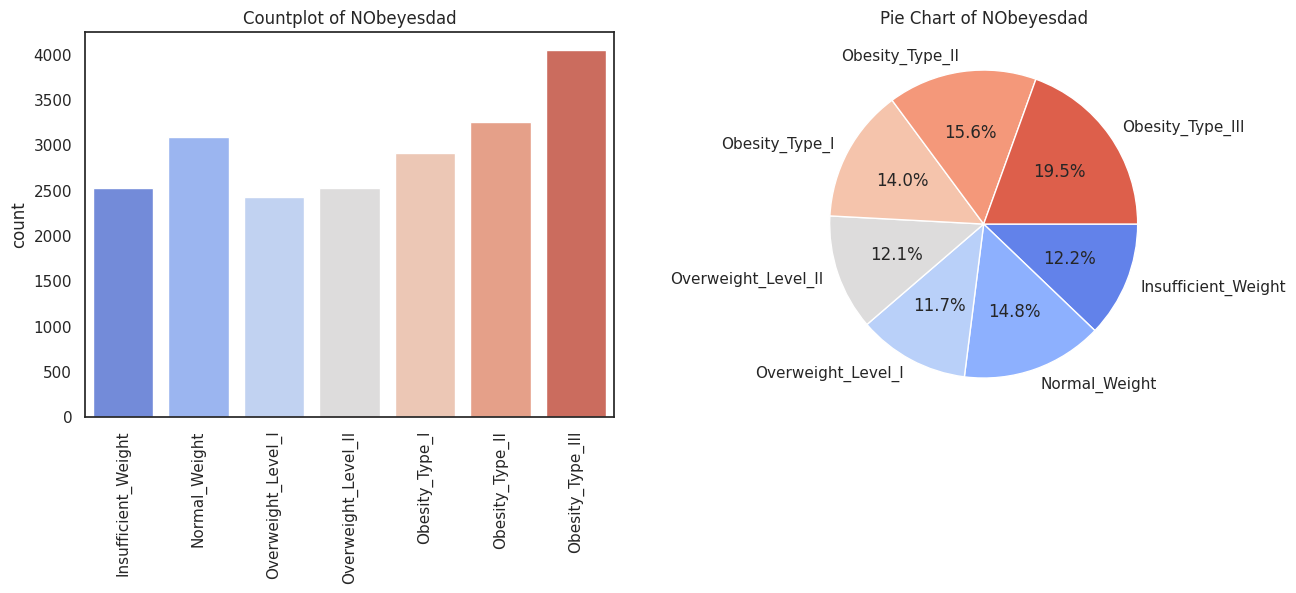

In [22]:
order_list = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

f,ax = plt.subplots(1,2, figsize = (15,5))
palette = sns.color_palette('coolwarm', 7)
sns.countplot(x='NObeyesdad', data = df_train, palette = palette, order = order_list, ax = ax[0])
ax[0].set_title('Countplot of NObeyesdad')
ax[0].set_xticklabels(order_list, rotation=90)
ax[0].set_xlabel('')
df_train.groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, colors = palette, ax=ax[1])
ax[1].set_title('Pie Chart of NObeyesdad')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace = 0.2)
plt.show()

In [23]:
df2 = pd.DataFrame({'count': df_train.groupby('NObeyesdad')['NObeyesdad'].count(),
                   'ratio' : round(df_train.groupby('NObeyesdad')['NObeyesdad'].count()/df_train.shape[0]*100,1)})
df2

count  ratio
NObeyesdad                       
Insufficient_Weight   2523   12.2
Normal_Weight         3082   14.8
Obesity_Type_I        2910   14.0
Obesity_Type_II       3248   15.6
Obesity_Type_III      4046   19.5
Overweight_Level_I    2427   11.7
Overweight_Level_II   2522   12.1

**Observations:**
* NObeyesdad is a feature consisting of 7 categories according to body weight or obesity level which they have order. -> **Ordinal feature**

    - Insufficient_Weight > Normal_Weight > Overweight_Level_I > Overweight_Level_II > Obesity_Type_I > Obesity_Type_II > Obesity_Type_III

* Except Insufficient_Weight and Normal_Weight, the number of people having more weight or Obesity increases.

* Since it was confirmed through plots and tables that all seven categories consisted of similar levels of numbers, there is no need to consider the issue of imbalance.

### **3.1.2 Gender**

In [24]:
df_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
pd.crosstab(df_train.NObeyesdad, df_train.Gender, margins = True).reindex(order_list)

Gender               Female  Male   All
NObeyesdad                             
Insufficient_Weight    1621   902  2523
Normal_Weight          1660  1422  3082
Overweight_Level_I     1070  1357  2427
Overweight_Level_II     755  1767  2522
Obesity_Type_I         1267  1643  2910
Obesity_Type_II           8  3240  3248
Obesity_Type_III       4041     5  4046

In [26]:
pd.crosstab(df_train.NObeyesdad, df_train.Gender, normalize = 'index', margins = True).reindex(order_list)

Gender                 Female      Male
NObeyesdad                             
Insufficient_Weight  0.642489  0.357511
Normal_Weight        0.538611  0.461389
Overweight_Level_I   0.440874  0.559126
Overweight_Level_II  0.299366  0.700634
Obesity_Type_I       0.435395  0.564605
Obesity_Type_II      0.002463  0.997537
Obesity_Type_III     0.998764  0.001236

In [27]:
pd.crosstab(df_train[df_train['Gender']=='Male']['NObeyesdad'], df_train[df_train['Gender']=='Male']['Gender']).reindex(order_list)

Gender               Male
NObeyesdad               
Insufficient_Weight   902
Normal_Weight        1422
Overweight_Level_I   1357
Overweight_Level_II  1767
Obesity_Type_I       1643
Obesity_Type_II      3240
Obesity_Type_III        5

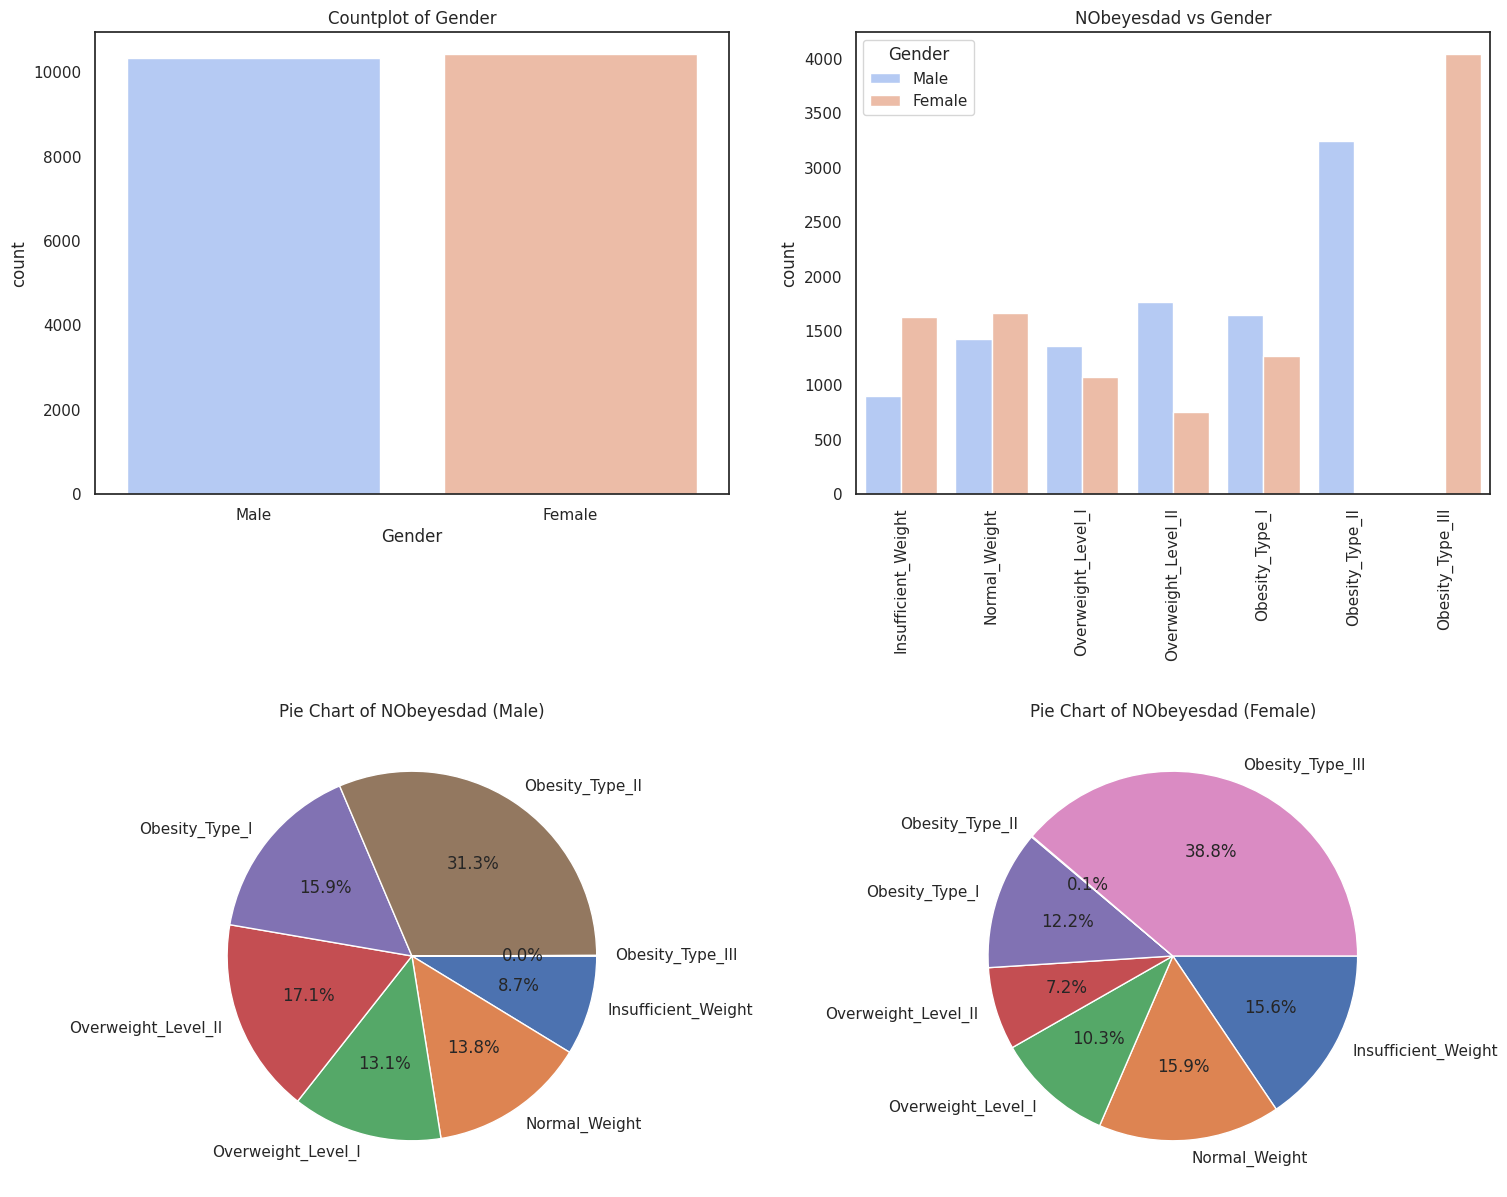

In [28]:
f,ax = plt.subplots(2,2, figsize = (18,15))
palette = sns.color_palette('coolwarm', 2)
sns.countplot(x= 'Gender', data = df_train, palette = palette, ax = ax[0,0])
ax[0,0].set_title('Countplot of Gender')
sns.countplot(x='NObeyesdad', hue = 'Gender', data = df_train, order = order_list, palette = palette, ax = ax[0,1])
ax[0,1].set_title('NObeyesdad vs Gender')
ax[0,1].set_xticklabels(order_list, rotation=90)
ax[0,1].set_xlabel('')
df_train[df_train['Gender'] == 'Male'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,0])
ax[1,0].set_title('Pie Chart of NObeyesdad (Male)')
ax[1,0].set_ylabel('')
df_train[df_train['Gender'] == 'Female'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,1])
ax[1,1].set_title('Pie Chart of NObeyesdad (Female)')
ax[1,1].set_ylabel('')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**Observations:**
* The number of male and female is the almost same.
* For male, the number of man with more weight shows increasing trend before Obesity III, but for female the number of women with more weight shows decreaing trend before Obesity II.For male, the man with Obesity III is nearly 0%, and for female the women with Obesity II is nearly 0%.
* By comparison of ratio, women occupy a high proportion at both ends, while men occupy a higher proportion than women in the middle range. This appears to be somewhat influenced by gender differences in eating habits and types of activity between men and women.

### **3.1.3 family_history_with_overweight**

In [29]:
df_train['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [30]:
pd.crosstab(df_train.NObeyesdad, df_train.family_history_with_overweight, margins = True).reindex(order_list)

family_history_with_overweight    no   yes   All
NObeyesdad                                      
Insufficient_Weight             1449  1074  2523
Normal_Weight                   1292  1790  3082
Overweight_Level_I               756  1671  2427
Overweight_Level_II              193  2329  2522
Obesity_Type_I                    48  2862  2910
Obesity_Type_II                    5  3243  3248
Obesity_Type_III                   1  4045  4046

In [31]:
pd.crosstab(df_train.NObeyesdad, df_train.family_history_with_overweight, normalize = 'index', margins = True).reindex(order_list)

family_history_with_overweight        no       yes
NObeyesdad                                        
Insufficient_Weight             0.574316  0.425684
Normal_Weight                   0.419208  0.580792
Overweight_Level_I              0.311496  0.688504
Overweight_Level_II             0.076527  0.923473
Obesity_Type_I                  0.016495  0.983505
Obesity_Type_II                 0.001539  0.998461
Obesity_Type_III                0.000247  0.999753

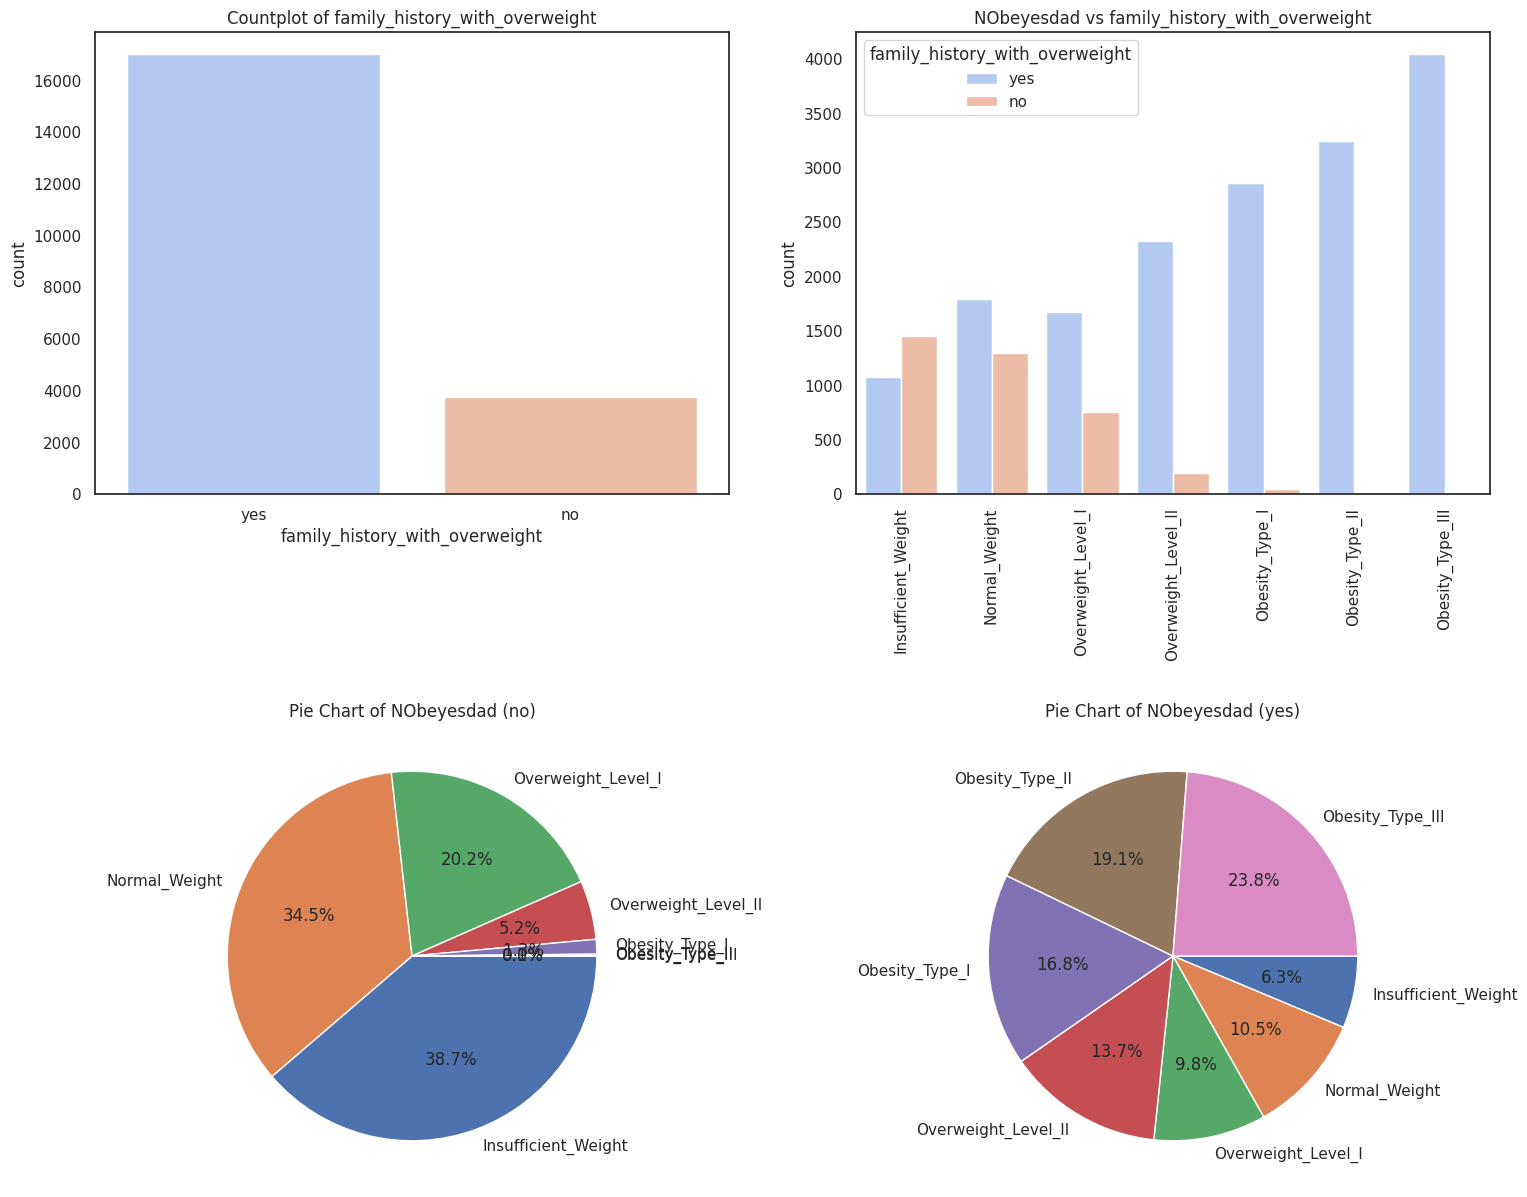

In [32]:
f,ax = plt.subplots(2,2, figsize = (18,15))
palette = sns.color_palette('coolwarm', 2)
sns.countplot(x= 'family_history_with_overweight', data = df_train, palette = palette, ax = ax[0,0])
ax[0,0].set_title('Countplot of family_history_with_overweight')
sns.countplot(x='NObeyesdad', hue = 'family_history_with_overweight', data = df_train, order = order_list, palette = palette, ax = ax[0,1])
ax[0,1].set_title('NObeyesdad vs family_history_with_overweight')
ax[0,1].set_xticklabels(order_list, rotation=90)
ax[0,1].set_xlabel('')
df_train[df_train['family_history_with_overweight'] == 'no'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,0])
ax[1,0].set_title('Pie Chart of NObeyesdad (no)')
ax[1,0].set_ylabel('')
df_train[df_train['family_history_with_overweight'] == 'yes'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,1])
ax[1,1].set_title('Pie Chart of NObeyesdad (yes)')
ax[1,1].set_ylabel('')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**Observations:**
* The number of people with a "yes" in the family_history_with_overweight feature exceeds those with a "no".
* Observing the trends in obesity levels by category, there is a tendency for obesity levels to gradually increase in cases where there is a family history of obesity. In contrast, the "Insufficient_weight" category predominates among those without a family history of obesity, with a tendency for obesity levels to decrease.
* These results indicate that obesity may be more prevalently expressed due to genetic factors or the dietary and lifestyle habits of the family, demonstrating that the family_history_with_overweight feature is associated with obesity levels.

### **3.1.4 FAVC**

* **FAVC**: Do you eat high caloric food frequently?-Yes or No

In [33]:
df_train['FAVC'].unique()

array(['yes', 'no'], dtype=object)

In [34]:
pd.crosstab(df_train.NObeyesdad, df_train.FAVC, margins = True).reindex(order_list)

FAVC                  no   yes   All
NObeyesdad                          
Insufficient_Weight  370  2153  2523
Normal_Weight        495  2587  3082
Overweight_Level_I   224  2203  2427
Overweight_Level_II  539  1983  2522
Obesity_Type_I        93  2817  2910
Obesity_Type_II       54  3194  3248
Obesity_Type_III       1  4045  4046

In [35]:
pd.crosstab(df_train.NObeyesdad, df_train.FAVC, normalize = 'index', margins = True).reindex(order_list)

FAVC                       no       yes
NObeyesdad                             
Insufficient_Weight  0.146651  0.853349
Normal_Weight        0.160610  0.839390
Overweight_Level_I   0.092295  0.907705
Overweight_Level_II  0.213719  0.786281
Obesity_Type_I       0.031959  0.968041
Obesity_Type_II      0.016626  0.983374
Obesity_Type_III     0.000247  0.999753

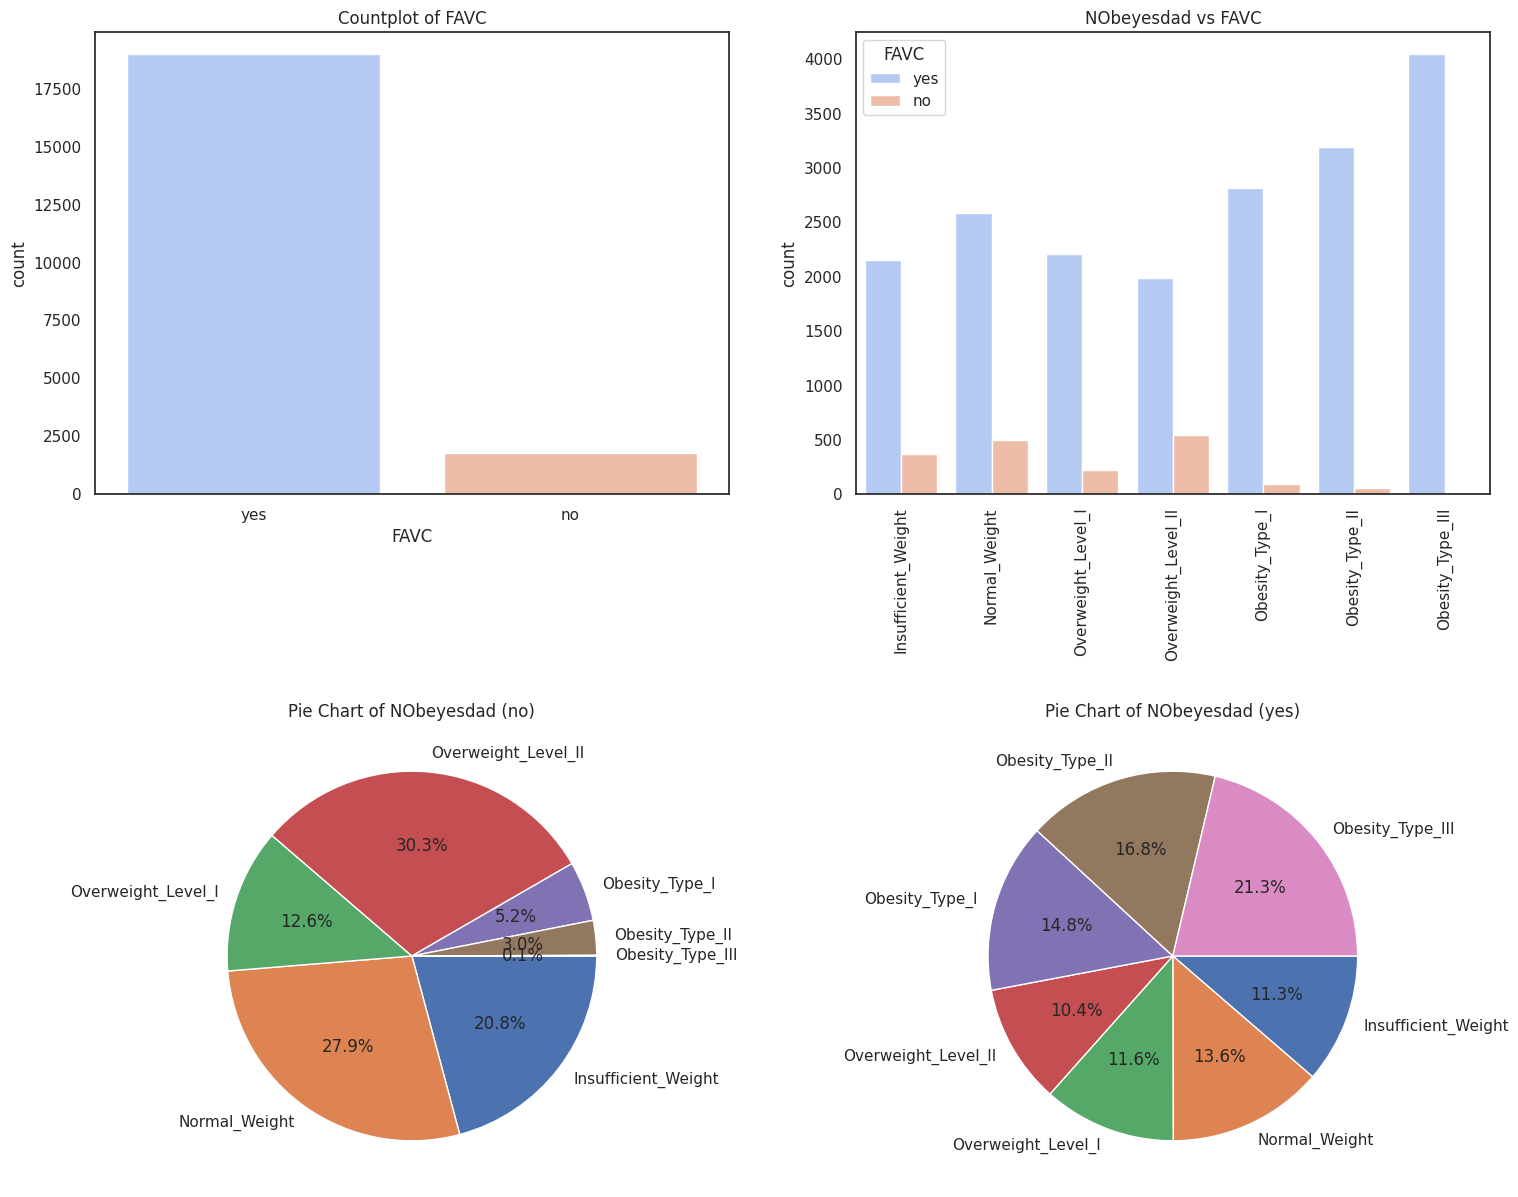

In [36]:
f,ax = plt.subplots(2,2, figsize = (18,15))
palette = sns.color_palette('coolwarm', 2)
sns.countplot(x= 'FAVC', data = df_train, palette = palette, ax = ax[0,0])
ax[0,0].set_title('Countplot of FAVC')
sns.countplot(x='NObeyesdad', hue = 'FAVC', data = df_train, order = order_list, palette = palette, ax = ax[0,1])
ax[0,1].set_title('NObeyesdad vs FAVC')
ax[0,1].set_xticklabels(order_list, rotation=90)
ax[0,1].set_xlabel('')
df_train[df_train['FAVC'] == 'no'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,0])
ax[1,0].set_title('Pie Chart of NObeyesdad (no)')
ax[1,0].set_ylabel('')
df_train[df_train['FAVC'] == 'yes'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,1])
ax[1,1].set_title('Pie Chart of NObeyesdad (yes)')
ax[1,1].set_ylabel('')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**Observations:**
* The number of people whose FAVC is no is very small compared to those whose FAVC is yes.
* If people do not eat high-calorie foods frequently (FAVC == no), the obesity rate is low, but if people frequently eat high-calorie foods (FAVC == yes), the obesity rate tends to be slightly higher than the rate of insufficient and normal weight.

    -> The higher the frequency of high calorie intake, the more likely it is to affect obesity, and this seems to make sense.

### **3.1.5 CAEC**
* **CAEC**:Do you eat any food between meals?-No, Sometimes, Frequently, Always

In [37]:
df_train['CAEC'].unique()

array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object)

In [38]:
pd.crosstab(df_train.NObeyesdad, df_train.CAEC, margins = True).reindex(order_list)

CAEC                 Always  Frequently  Sometimes   no   All
NObeyesdad                                                   
Insufficient_Weight      35        1212       1268    8  2523
Normal_Weight           275         706       2065   36  3082
Overweight_Level_I       60         273       1875  219  2427
Overweight_Level_II      33         210       2273    6  2522
Obesity_Type_I           64          56       2782    8  2910
Obesity_Type_II          10          12       3224    2  3248
Obesity_Type_III          1           3       4042    0  4046

In [39]:
pd.crosstab(df_train.NObeyesdad, df_train.CAEC, normalize = 'index', margins = True).reindex(order_list)

CAEC                   Always  Frequently  Sometimes        no
NObeyesdad                                                    
Insufficient_Weight  0.013872    0.480380   0.502576  0.003171
Normal_Weight        0.089228    0.229072   0.670019  0.011681
Overweight_Level_I   0.024722    0.112485   0.772559  0.090235
Overweight_Level_II  0.013085    0.083267   0.901269  0.002379
Obesity_Type_I       0.021993    0.019244   0.956014  0.002749
Obesity_Type_II      0.003079    0.003695   0.992611  0.000616
Obesity_Type_III     0.000247    0.000741   0.999011  0.000000

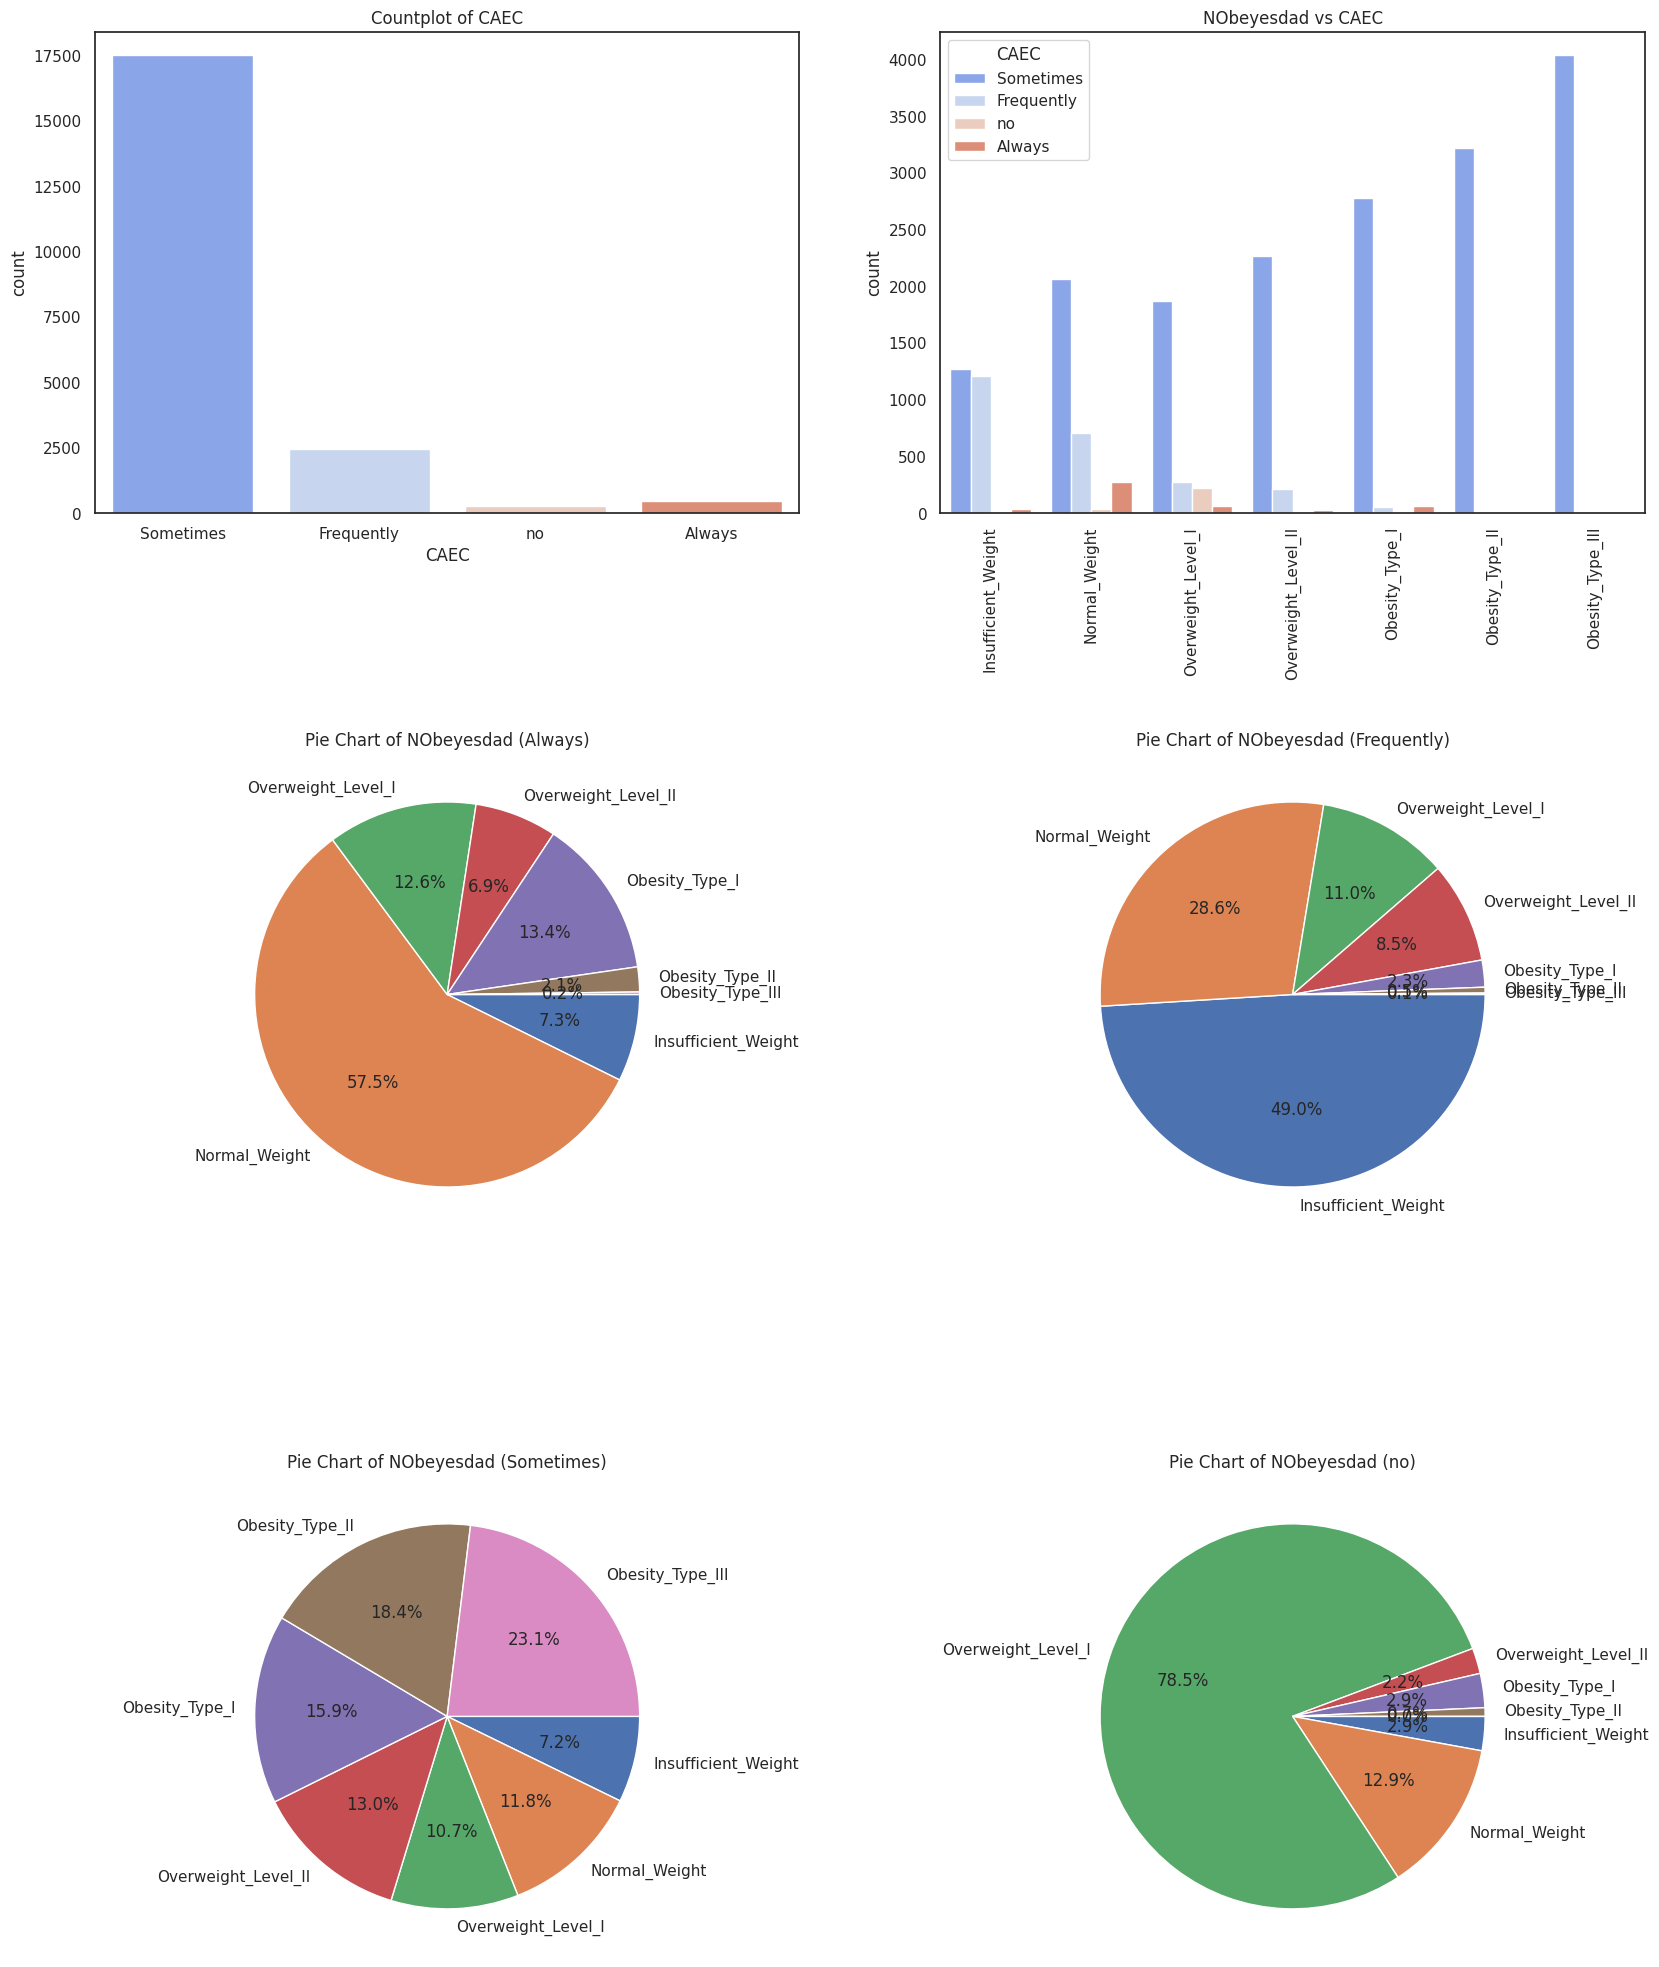

In [40]:
f,ax = plt.subplots(3,2, figsize = (20,25))
palette = sns.color_palette('coolwarm', 4)
sns.countplot(x= 'CAEC', data = df_train, palette = palette, ax = ax[0,0])
ax[0,0].set_title('Countplot of CAEC')
sns.countplot(x='NObeyesdad', hue = 'CAEC', data = df_train, order = order_list, palette = palette, ax = ax[0,1])
ax[0,1].set_title('NObeyesdad vs CAEC')
ax[0,1].set_xticklabels(order_list, rotation=90)
ax[0,1].set_xlabel('')
df_train[df_train['CAEC'] == 'Always'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,0])
ax[1,0].set_title('Pie Chart of NObeyesdad (Always)')
ax[1,0].set_ylabel('')
df_train[df_train['CAEC'] == 'Frequently'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,1])
ax[1,1].set_title('Pie Chart of NObeyesdad (Frequently)')
ax[1,1].set_ylabel('')
df_train[df_train['CAEC'] == 'Sometimes'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[2,0])
ax[2,0].set_title('Pie Chart of NObeyesdad (Sometimes)')
ax[2,0].set_ylabel('')
df_train[df_train['CAEC'] == 'no'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[2,1])
ax[2,1].set_title('Pie Chart of NObeyesdad (no)')
ax[2,1].set_ylabel('')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**Observtiions:**
* Among the four categories in CAEC, the "sometimes" category significantly outnumbers the others.
* Looking at the obesity trends according to each category, there is a tendency for the number of people with high obesity to increase in the "sometimes" category. On the other hand, the "frequently" category shows a higher tendency of having people with insufficient weight compared to other cases.
* Regarding the ratio of obesity levels in each category, the "Always" category is mostly Normal weight, the "Frequently" category is mostly Insufficient weight, the "Sometimes" category is mostly Obesity_III, and the "No" category is mostly Overweight_Level_I.
* CAEC is a variable related to the frequency of eating between meals, and it is generally thought that a higher frequency in CAEC would correlate with higher obesity levels. However, the observed results show a different outcome, suggesting that the data may be skewed due to the very low numbers in categories other than "Sometimes".

### **3.1.6 SMOKE**

In [41]:
df_train['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [42]:
pd.crosstab(df_train.NObeyesdad, df_train.SMOKE, margins = True).reindex(order_list)

SMOKE                  no  yes   All
NObeyesdad                          
Insufficient_Weight  2516    7  2523
Normal_Weight        3036   46  3082
Overweight_Level_I   2402   25  2427
Overweight_Level_II  2497   25  2522
Obesity_Type_I       2886   24  2910
Obesity_Type_II      3134  114  3248
Obesity_Type_III     4042    4  4046

In [43]:
pd.crosstab(df_train.NObeyesdad, df_train.SMOKE, normalize = 'index', margins = True).reindex(order_list)

SMOKE                      no       yes
NObeyesdad                             
Insufficient_Weight  0.997226  0.002774
Normal_Weight        0.985075  0.014925
Overweight_Level_I   0.989699  0.010301
Overweight_Level_II  0.990087  0.009913
Obesity_Type_I       0.991753  0.008247
Obesity_Type_II      0.964901  0.035099
Obesity_Type_III     0.999011  0.000989

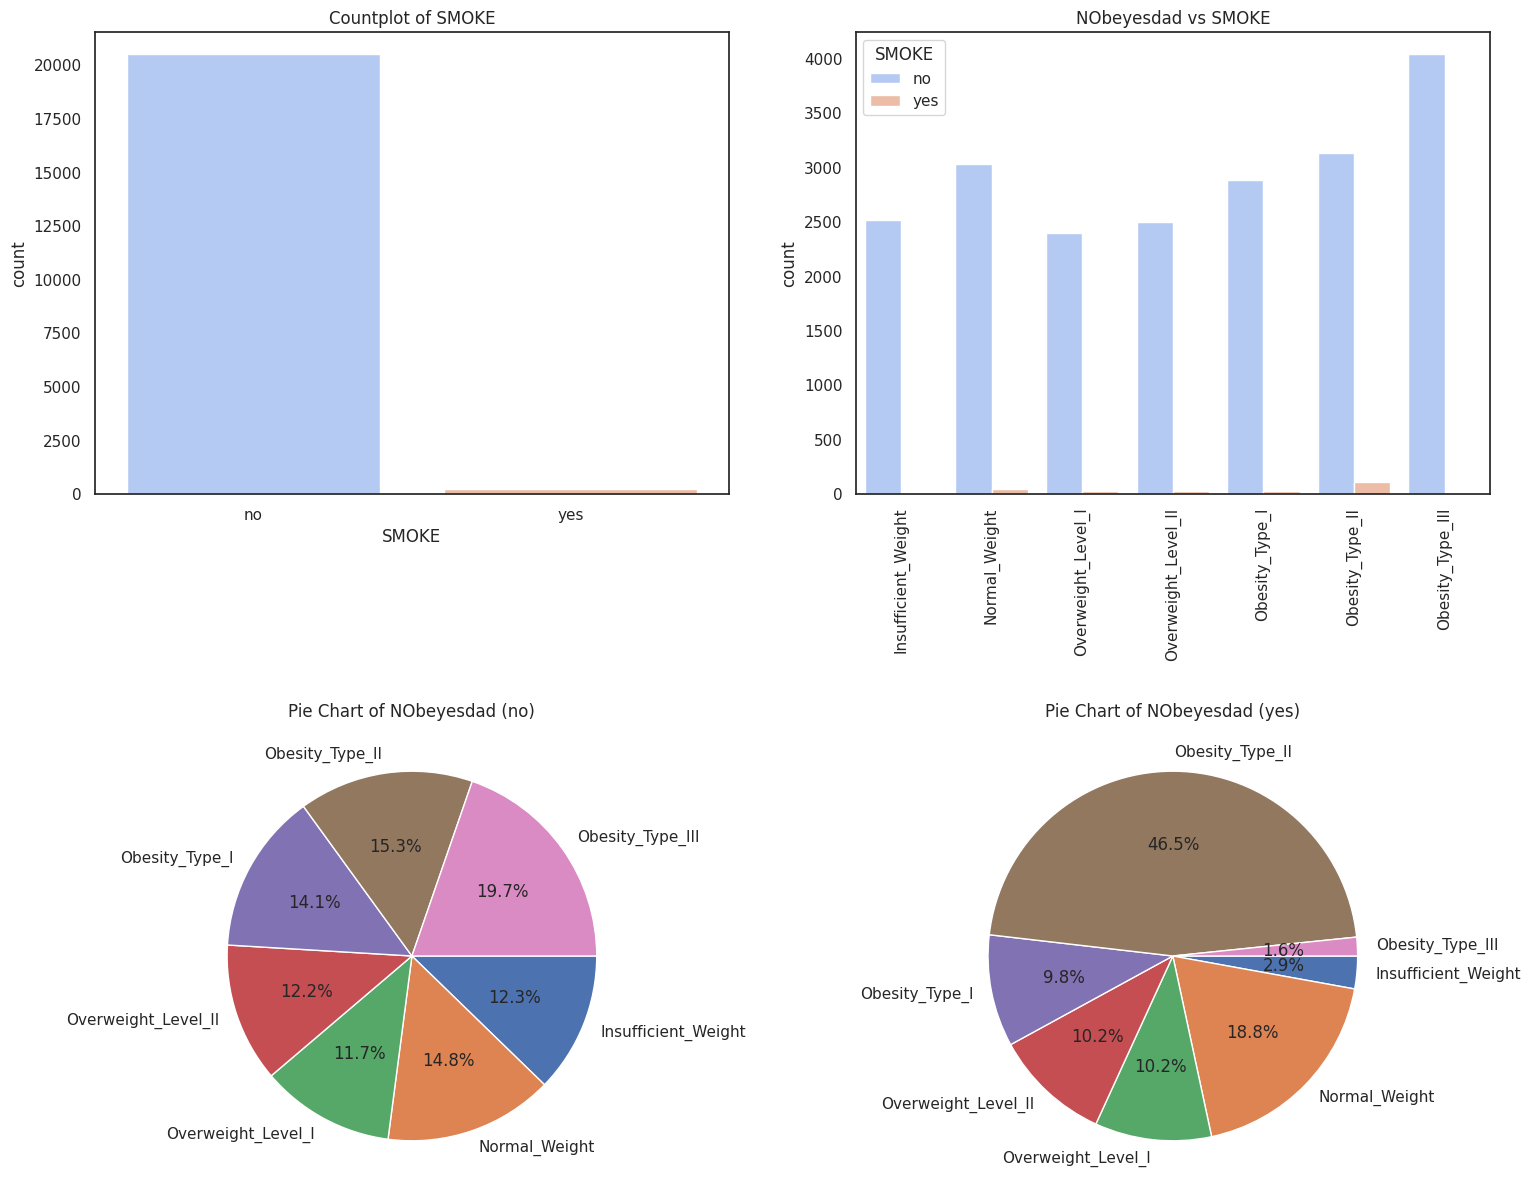

In [44]:
f,ax = plt.subplots(2,2, figsize = (18,15))
palette = sns.color_palette('coolwarm', 2)
sns.countplot(x= 'SMOKE', data = df_train, palette = palette, ax = ax[0,0])
ax[0,0].set_title('Countplot of SMOKE')
sns.countplot(x='NObeyesdad', hue = 'SMOKE', data = df_train, order = order_list, palette = palette, ax = ax[0,1])
ax[0,1].set_title('NObeyesdad vs SMOKE')
ax[0,1].set_xticklabels(order_list, rotation=90)
ax[0,1].set_xlabel('')
df_train[df_train['SMOKE'] == 'no'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,0])
ax[1,0].set_title('Pie Chart of NObeyesdad (no)')
ax[1,0].set_ylabel('')
df_train[df_train['SMOKE'] == 'yes'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,1])
ax[1,1].set_title('Pie Chart of NObeyesdad (yes)')
ax[1,1].set_ylabel('')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**Observations:**
* The "no" category within the SMOKE variable significantly outnumbers the "yes" category.
* In the "no" category, there is a tendency for people to have higher obesity levels, excluding those with normal weight. However, when looked at proportionally, the differences in obesity levels between categories do not show a significant variance. It seems necessary to consider excluding the SMOKE category to improve the model's performance.

### **3.1.7 SCC**
**SCC**: Do you monitor the calories you eat daily?-Yes or No

In [45]:
df_train['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [46]:
pd.crosstab(df_train.NObeyesdad, df_train.SCC, margins = True).reindex(order_list)

SCC                    no  yes   All
NObeyesdad                          
Insufficient_Weight  2291  232  2523
Normal_Weight        2922  160  3082
Overweight_Level_I   2178  249  2427
Overweight_Level_II  2498   24  2522
Obesity_Type_I       2892   18  2910
Obesity_Type_II      3244    4  3248
Obesity_Type_III     4046    0  4046

In [47]:
pd.crosstab(df_train.NObeyesdad, df_train.SCC, normalize = 'index', margins = True).reindex(order_list)

SCC                        no       yes
NObeyesdad                             
Insufficient_Weight  0.908046  0.091954
Normal_Weight        0.948086  0.051914
Overweight_Level_I   0.897404  0.102596
Overweight_Level_II  0.990484  0.009516
Obesity_Type_I       0.993814  0.006186
Obesity_Type_II      0.998768  0.001232
Obesity_Type_III     1.000000  0.000000

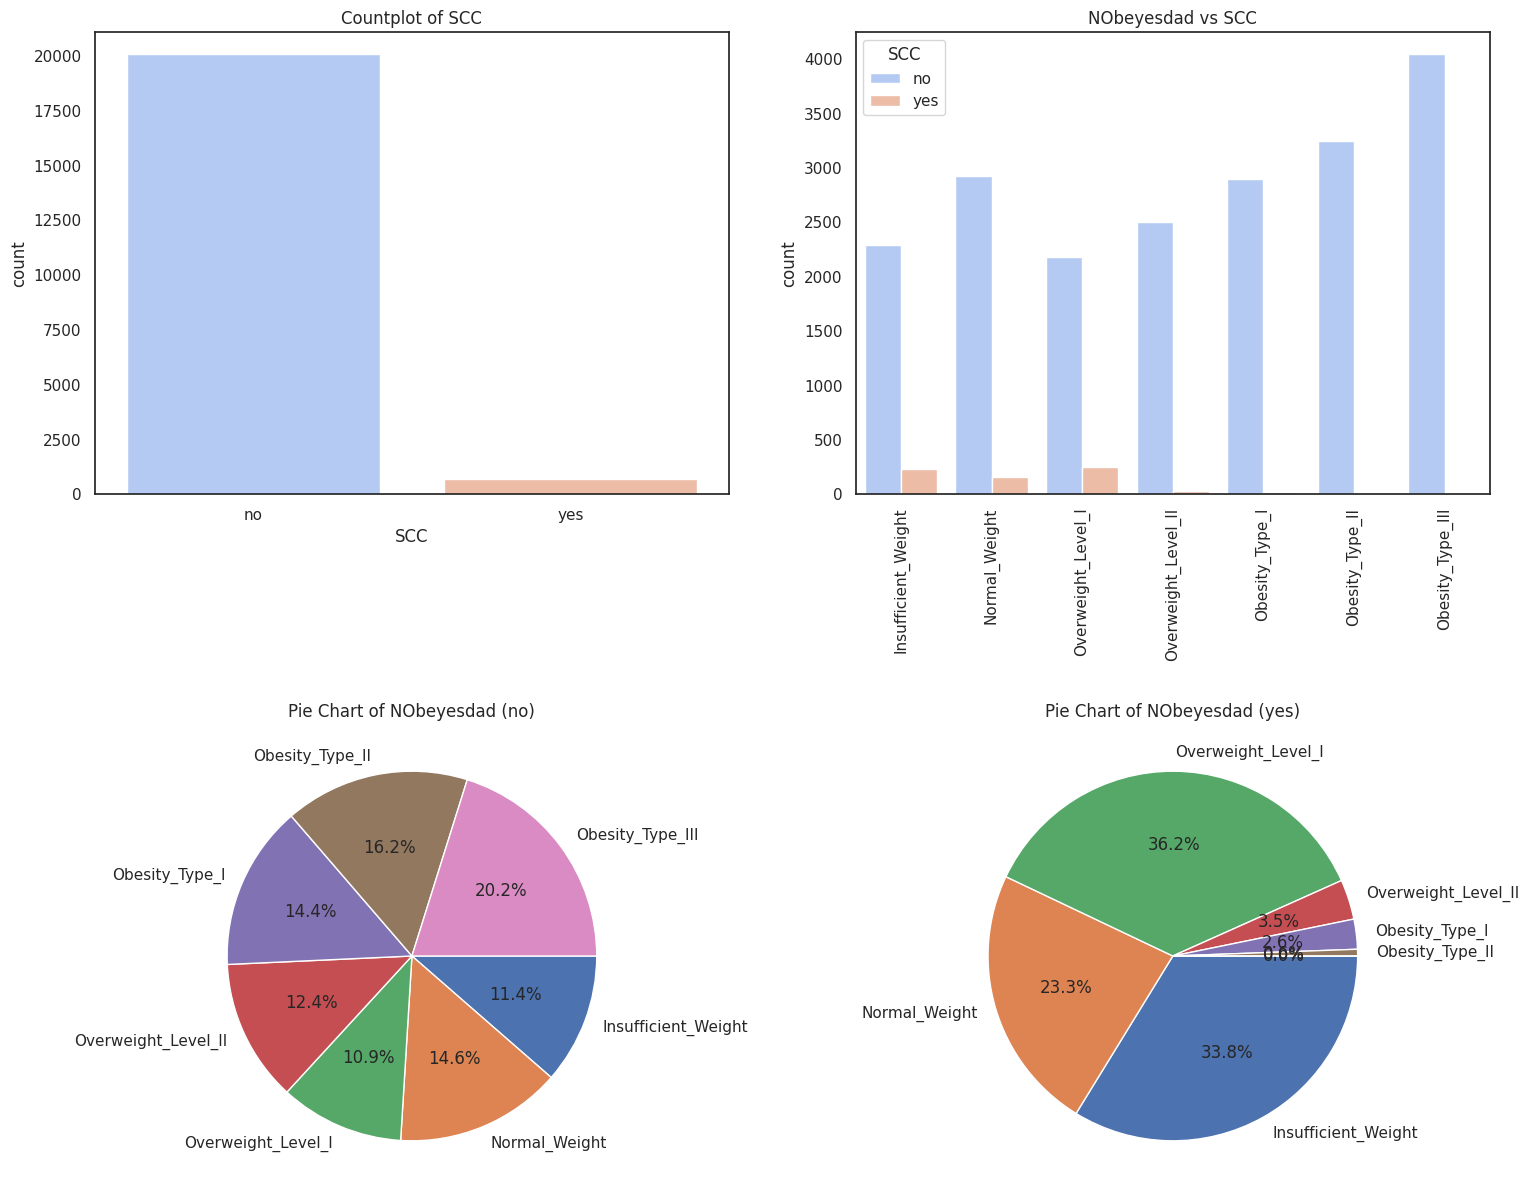

In [48]:
f,ax = plt.subplots(2,2, figsize = (18,15))
palette = sns.color_palette('coolwarm', 2)
sns.countplot(x= 'SCC', data = df_train, palette = palette, ax = ax[0,0])
ax[0,0].set_title('Countplot of SCC')
sns.countplot(x='NObeyesdad', hue = 'SCC', data = df_train, order = order_list, palette = palette, ax = ax[0,1])
ax[0,1].set_title('NObeyesdad vs SCC')
ax[0,1].set_xticklabels(order_list, rotation=90)
ax[0,1].set_xlabel('')
df_train[df_train['SCC'] == 'no'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,0])
ax[1,0].set_title('Pie Chart of NObeyesdad (no)')
ax[1,0].set_ylabel('')
df_train[df_train['SCC'] == 'yes'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,1])
ax[1,1].set_title('Pie Chart of NObeyesdad (yes)')
ax[1,1].set_ylabel('')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**Observations:**
* The number of people with a "yes" in the SCC feature is significantly less than those with a "no".
* Observing the obesity level ratios among individuals who monitor their daily calorie intake, most are distributed between Insufficient weight and Overweight_Level_I, whereas more than half of those who do not monitor are included in the Obesity category.
* This trend suggests that the SCC feature could influence obesity levels. Monitoring daily calorie intake implies managing calorie consumption, which logically leads to this outcome.

### **3.1.8 FAVC & CAEC vs SCC**

In [49]:
pd.crosstab(df_train.SCC, df_train.FAVC, normalize = 'columns')

FAVC        no       yes
SCC                     
no    0.901464  0.973027
yes   0.098536  0.026973

In [50]:
pd.crosstab(df_train.SCC, df_train.CAEC, normalize = 'columns')

CAEC    Always  Frequently  Sometimes        no
SCC                                            
no    0.939331    0.907362   0.976496  0.939068
yes   0.060669    0.092638   0.023504  0.060932

Text(0.5, 1.0, 'Countplot of CAEC vs SCC')

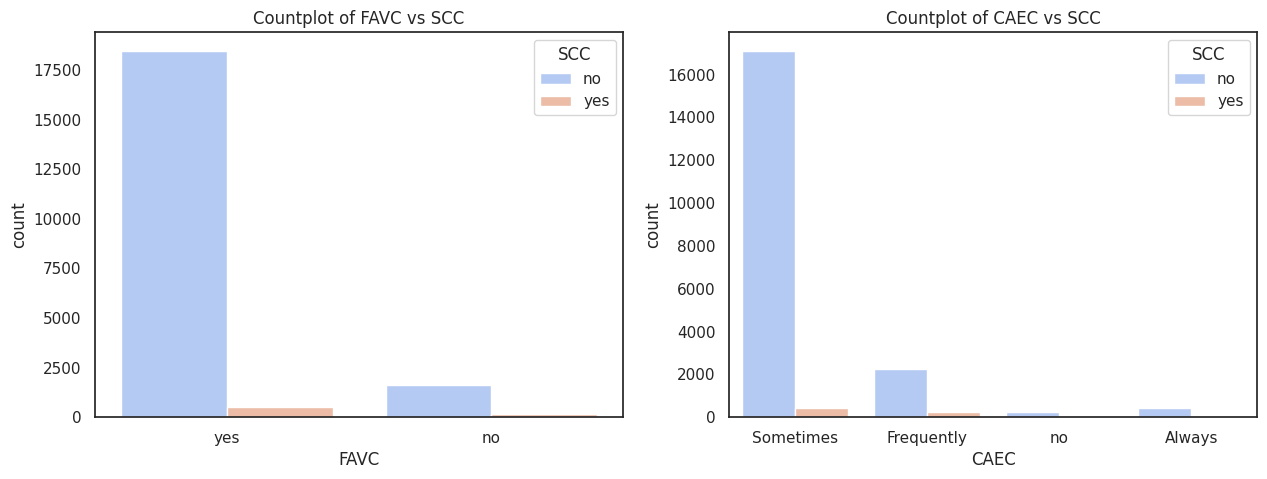

In [51]:
f,ax = plt.subplots(1,2, figsize = (15,5))
palette = sns.color_palette('coolwarm', 2)
sns.countplot(x= 'FAVC', hue = 'SCC', data = df_train, palette = palette, ax = ax[0])
ax[0].set_title('Countplot of FAVC vs SCC')
sns.countplot(x= 'CAEC', hue = 'SCC', data = df_train, palette = palette, ax = ax[1])
ax[1].set_title('Countplot of CAEC vs SCC')

**Observations:**
* Individuals who monitor their calorie intake (SCC == yes) have a lower ratio of consuming high-calorie foods (FAVC == yes) compared to those who do not monitor (FAVC no: 0.0985, FAVC yes: 0.0269). Monitoring calorie intake implies paying attention to calorie consumption, which aligns with common sense.
* In terms of CAEC vs SCC, the highest proportion of SCC == yes is observed in the Frequently category for eating between meals. Conversely, the lowest proportion of SCC == yes is seen in the Sometimes category. It is difficult to confirm a consistent trend in one direction.

### **3.1.9 CALC**
**CALC**: how often do you drink alcohol?-I do not drink, Sometimes, Frequently, Always

In [52]:
df_train['CALC'].unique()

array(['Sometimes', 'no', 'Frequently'], dtype=object)

In [53]:
pd.crosstab(df_train.NObeyesdad, df_train.CALC, margins = True).reindex(order_list)

CALC                 Frequently  Sometimes    no   All
NObeyesdad                                            
Insufficient_Weight          14       1620   889  2523
Normal_Weight                68       1940  1074  3082
Overweight_Level_I          130       1960   337  2427
Overweight_Level_II         228       1279  1015  2522
Obesity_Type_I               76       1444  1390  2910
Obesity_Type_II              13       2777   458  3248
Obesity_Type_III              0       4046     0  4046

In [54]:
pd.crosstab(df_train.NObeyesdad, df_train.CALC, normalize = 'index', margins = True).reindex(order_list)

CALC                 Frequently  Sometimes        no
NObeyesdad                                          
Insufficient_Weight    0.005549   0.642093  0.352358
Normal_Weight          0.022064   0.629461  0.348475
Overweight_Level_I     0.053564   0.807581  0.138855
Overweight_Level_II    0.090404   0.507137  0.402458
Obesity_Type_I         0.026117   0.496220  0.477663
Obesity_Type_II        0.004002   0.854988  0.141010
Obesity_Type_III       0.000000   1.000000  0.000000

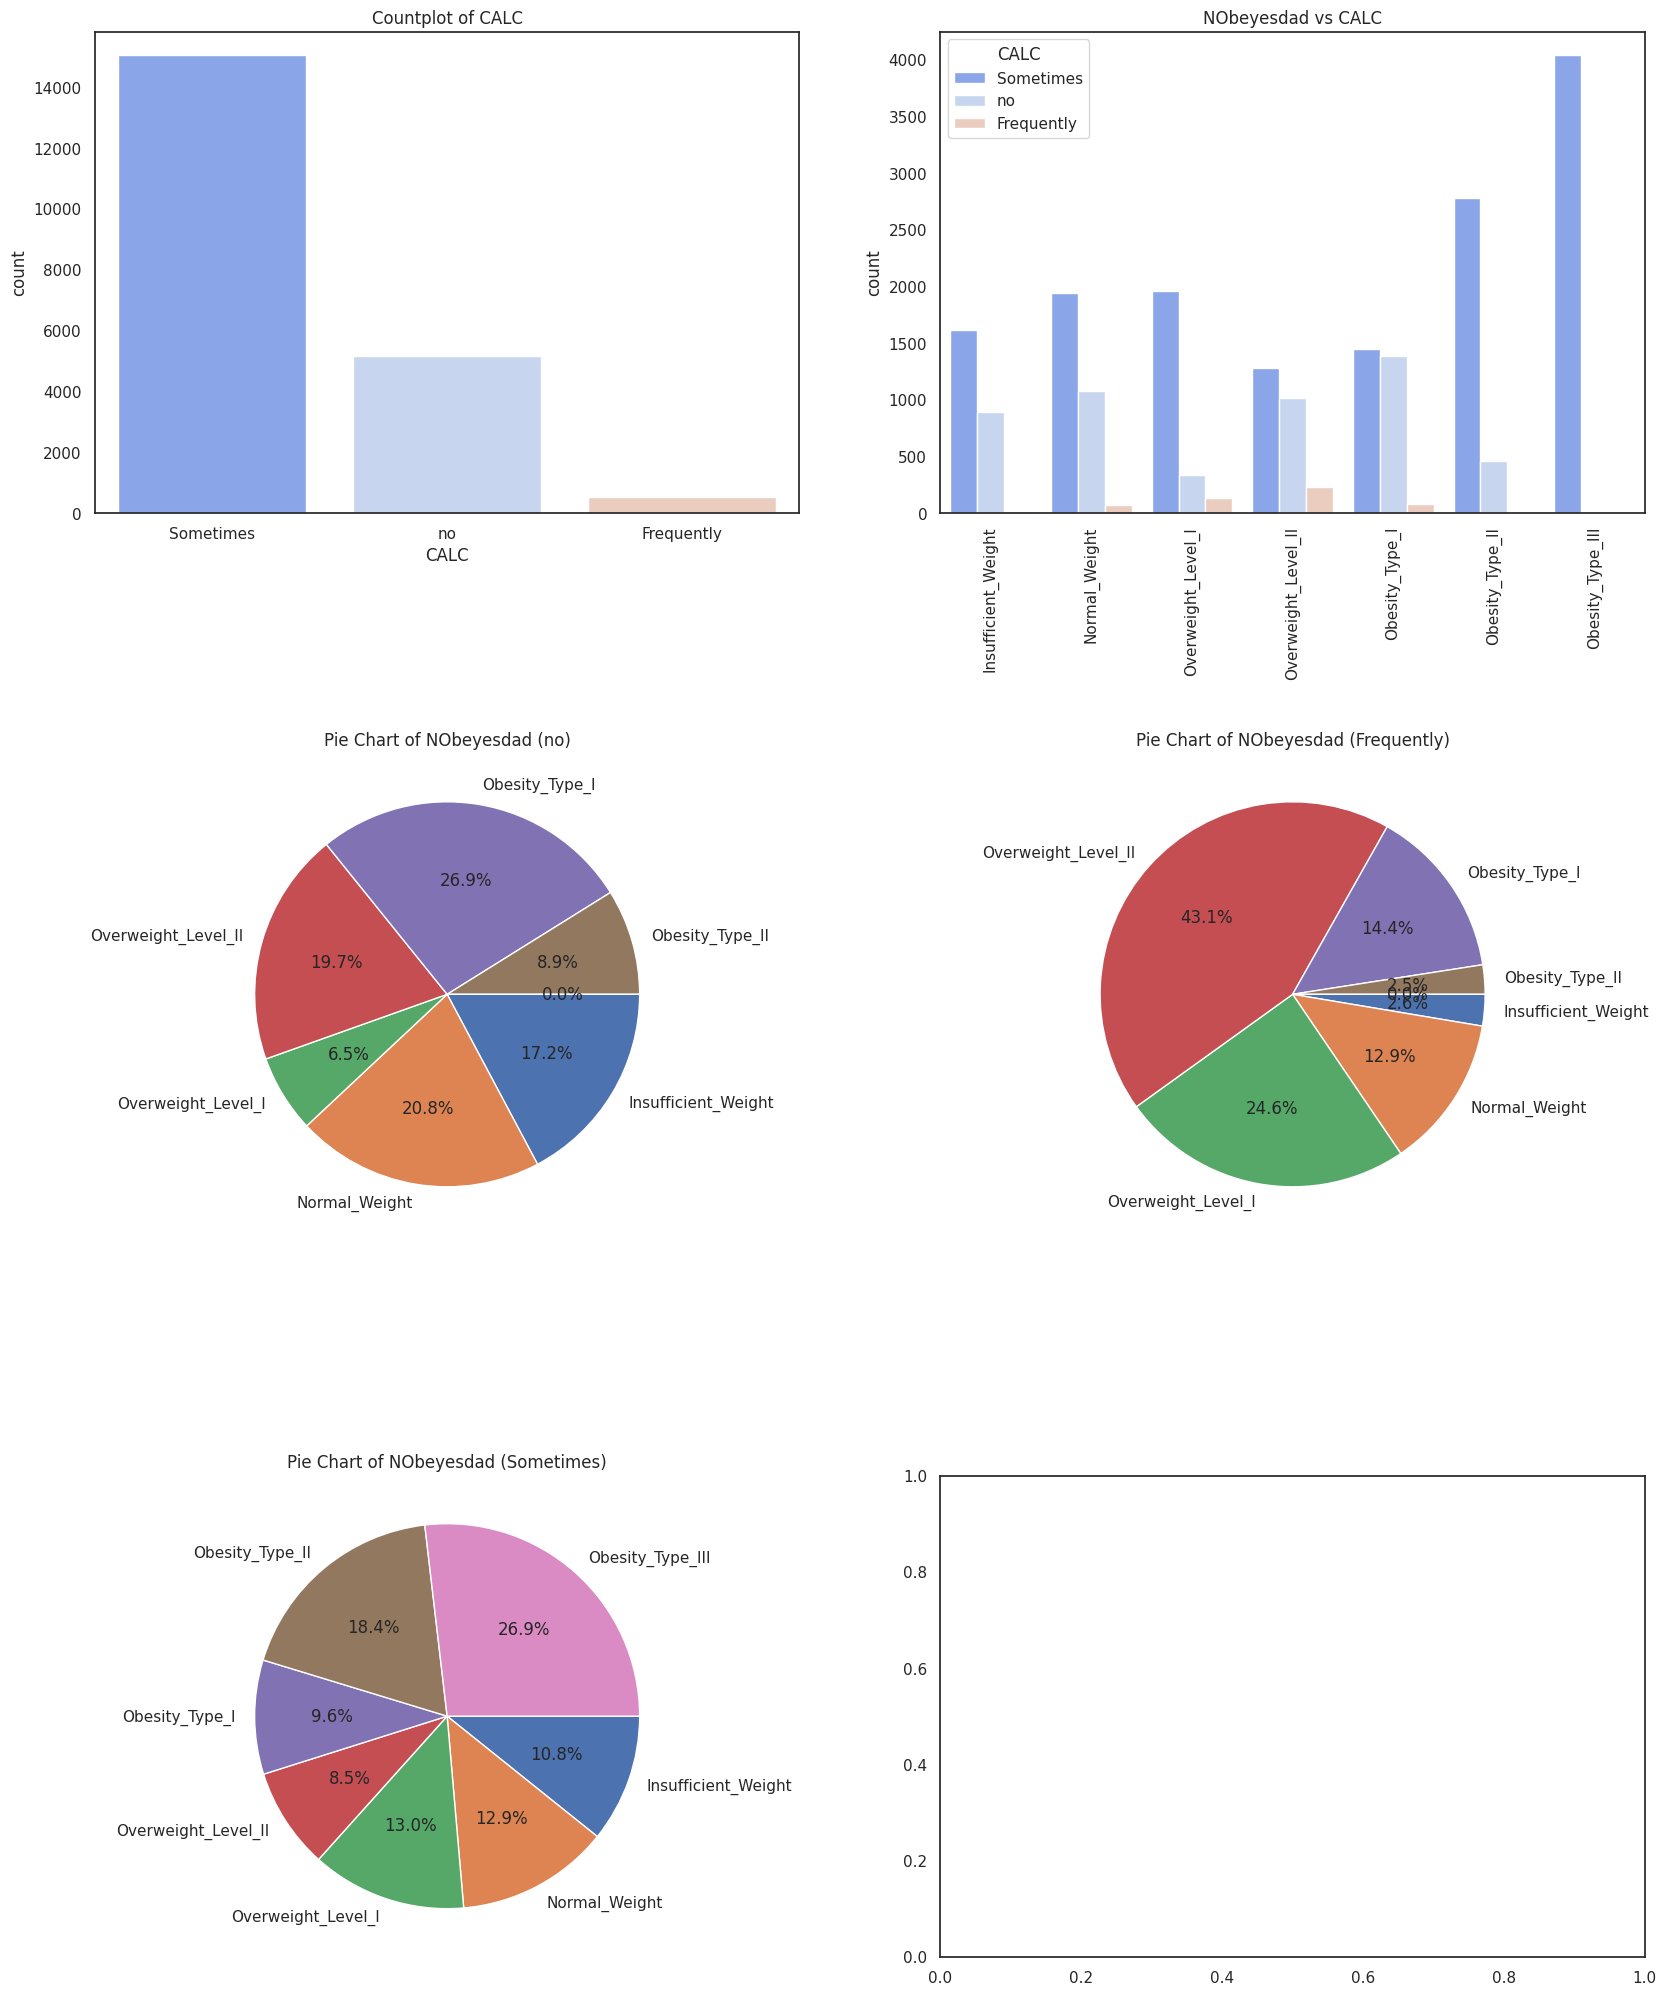

In [55]:
f,ax = plt.subplots(3,2, figsize = (20,25))
palette = sns.color_palette('coolwarm', 4)
sns.countplot(x= 'CALC', data = df_train, palette = palette, ax = ax[0,0])
ax[0,0].set_title('Countplot of CALC')
sns.countplot(x='NObeyesdad', hue = 'CALC', data = df_train, order = order_list, palette = palette, ax = ax[0,1])
ax[0,1].set_title('NObeyesdad vs CALC')
ax[0,1].set_xticklabels(order_list, rotation=90)
ax[0,1].set_xlabel('')
df_train[df_train['CALC'] == 'no'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,0])
ax[1,0].set_title('Pie Chart of NObeyesdad (no)')
ax[1,0].set_ylabel('')
df_train[df_train['CALC'] == 'Frequently'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,1])
ax[1,1].set_title('Pie Chart of NObeyesdad (Frequently)')
ax[1,1].set_ylabel('')
df_train[df_train['CALC'] == 'Sometimes'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[2,0])
ax[2,0].set_title('Pie Chart of NObeyesdad (Sometimes)')
ax[2,0].set_ylabel('')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**Observations:**
* The number of people decreases in the order of "sometimes", "no", "Frequently" categories in the CALC feature.
* The "Sometimes" category generally shows a tendency for an increase in obesity levels, whereas the "no" category does not show a consistent trend. The "Frequently" category exhibits a slight increase in Overweight_Level_II.
* The obesity level ratio in the "no" category accounts for 36%, while "Sometimes" exceeds 50%. However, "Frequently" tends to have a lower obesity level ratio compared to the "no" category. The trends in "no" and "Sometimes" seem logical to some extent, but the "Frequently" category appears to show a trend that deviates from common sense. This could be influenced by the small number of data points in that category.

### **3.1.10 MTRANS**
**MTRANS**:	Which transportation do you usually use?-Automobile, Motorbike, Bike, Public Transportation, Walking

In [56]:
df_train['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [57]:
pd.crosstab(df_train.NObeyesdad, df_train.MTRANS, margins = True).reindex(order_list)

MTRANS               Automobile  Bike  Motorbike  Public_Transportation  \
NObeyesdad                                                                
Insufficient_Weight         277     2          4                   2166   
Normal_Weight               309    14         17                   2565   
Overweight_Level_I          475     9          7                   1835   
Overweight_Level_II         782     4          3                   1649   
Obesity_Type_I              747     2          4                   2132   
Obesity_Type_II             944     1          3                   2294   
Obesity_Type_III              0     0          0                   4046   

MTRANS               Walking   All  
NObeyesdad                          
Insufficient_Weight       74  2523  
Normal_Weight            177  3082  
Overweight_Level_I       101  2427  
Overweight_Level_II       84  2522  
Obesity_Type_I            25  2910  
Obesity_Type_II            6  3248  
Obesity_Type_III           0  4046

In [58]:
pd.crosstab(df_train.NObeyesdad, df_train.MTRANS, normalize = 'index', margins = True).reindex(order_list)

MTRANS               Automobile      Bike  Motorbike  Public_Transportation  \
NObeyesdad                                                                    
Insufficient_Weight    0.109790  0.000793   0.001585               0.858502   
Normal_Weight          0.100260  0.004543   0.005516               0.832252   
Overweight_Level_I     0.195715  0.003708   0.002884               0.756077   
Overweight_Level_II    0.310071  0.001586   0.001190               0.653846   
Obesity_Type_I         0.256701  0.000687   0.001375               0.732646   
Obesity_Type_II        0.290640  0.000308   0.000924               0.706281   
Obesity_Type_III       0.000000  0.000000   0.000000               1.000000   

MTRANS                Walking  
NObeyesdad                     
Insufficient_Weight  0.029330  
Normal_Weight        0.057430  
Overweight_Level_I   0.041615  
Overweight_Level_II  0.033307  
Obesity_Type_I       0.008591  
Obesity_Type_II      0.001847  
Obesity_Type_III     0.000000

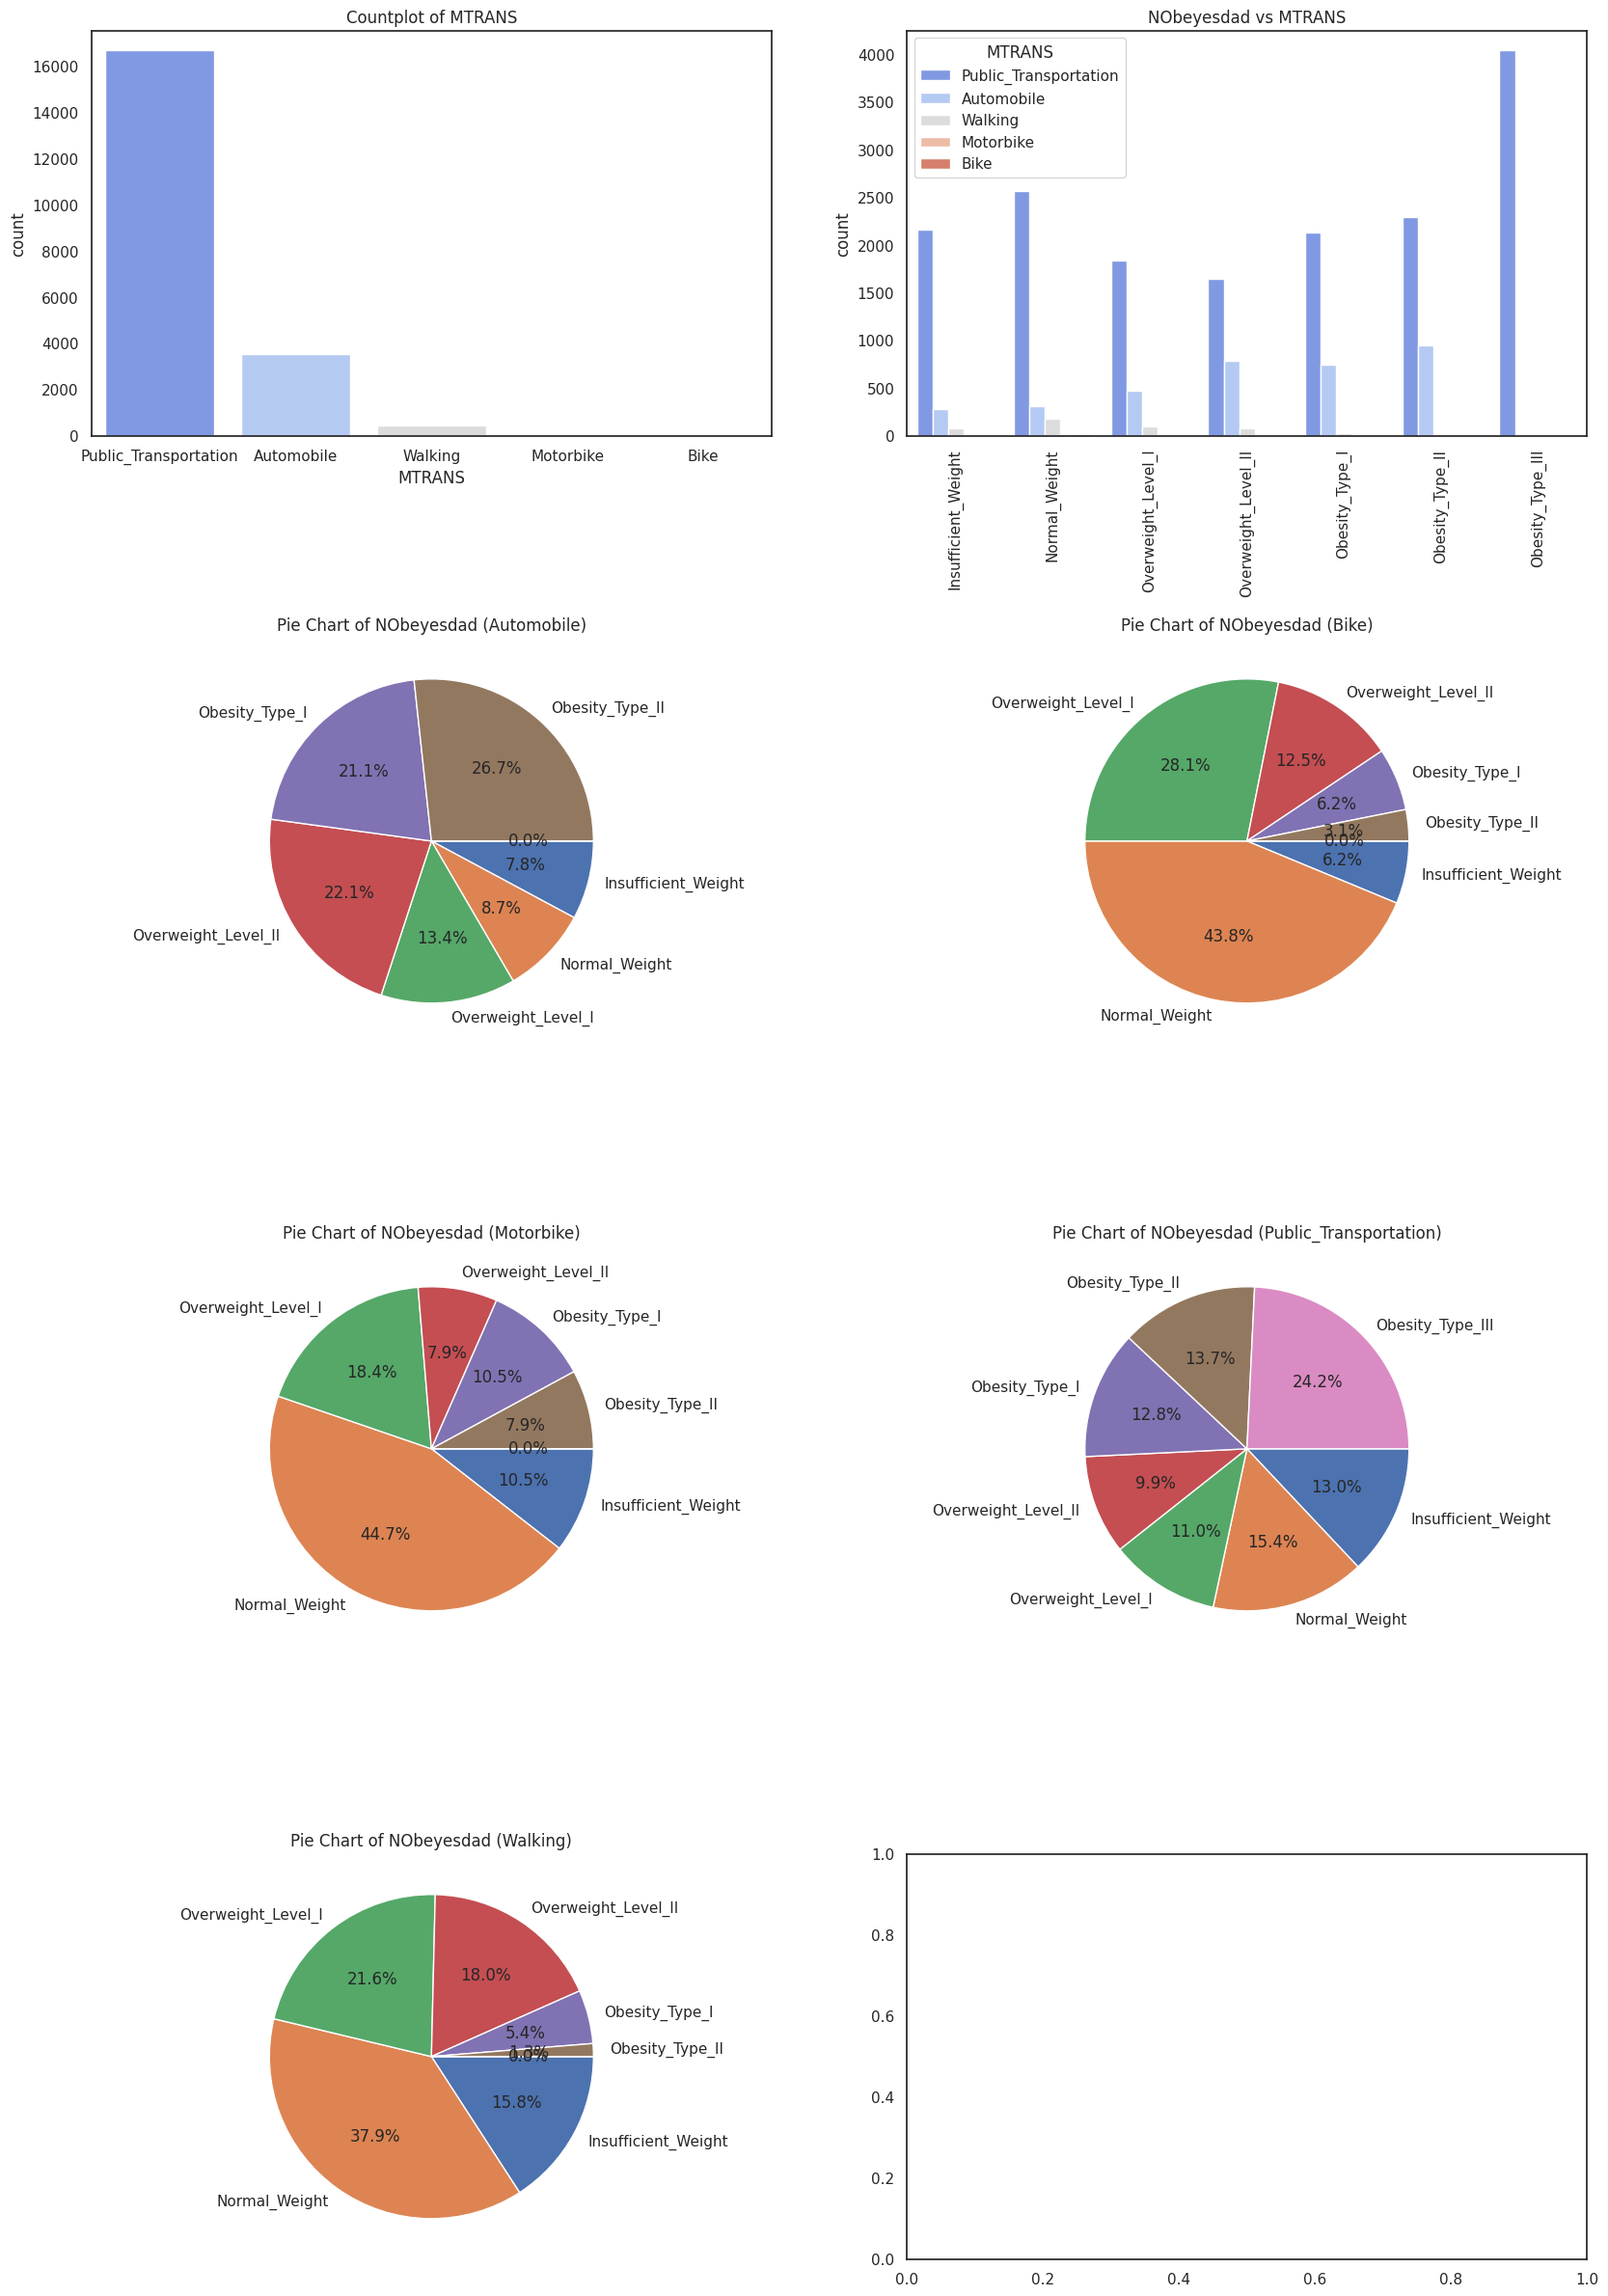

In [59]:
f,ax = plt.subplots(4,2, figsize = (20,30))
palette = sns.color_palette('coolwarm', 5)
sns.countplot(x= 'MTRANS', data = df_train, palette = palette, ax = ax[0,0])
ax[0,0].set_title('Countplot of MTRANS')
sns.countplot(x='NObeyesdad', hue = 'MTRANS', data = df_train, order = order_list, palette = palette, ax = ax[0,1])
ax[0,1].set_title('NObeyesdad vs MTRANS')
ax[0,1].set_xticklabels(order_list, rotation=90)
ax[0,1].set_xlabel('')
df_train[df_train['MTRANS'] == 'Automobile'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,0])
ax[1,0].set_title('Pie Chart of NObeyesdad (Automobile)')
ax[1,0].set_ylabel('')
df_train[df_train['MTRANS'] == 'Bike'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[1,1])
ax[1,1].set_title('Pie Chart of NObeyesdad (Bike)')
ax[1,1].set_ylabel('')
df_train[df_train['MTRANS'] == 'Motorbike'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[2,0])
ax[2,0].set_title('Pie Chart of NObeyesdad (Motorbike)')
ax[2,0].set_ylabel('')
df_train[df_train['MTRANS'] == 'Public_Transportation'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[2,1])
ax[2,1].set_title('Pie Chart of NObeyesdad (Public_Transportation)')
ax[2,1].set_ylabel('')
df_train[df_train['MTRANS'] == 'Walking'].groupby('NObeyesdad')['NObeyesdad'].count().reindex(order_list).plot.pie(autopct='%.1f%%', counterclock=False, ax=ax[3,0])
ax[3,0].set_title('Pie Chart of NObeyesdad (Walking)')
ax[3,0].set_ylabel('')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**Observations:**
* Among the MTRANS feature categories, Public_Transportation has the highest number, followed by Automobile, Walking, Motorbike, and Bike.
* Public_Transportation shows the highest number of Obesity_III, while the other categories exhibit similar levels. Automobile tends to show an overall increase in obesity levels.
* While the Obesity category accounts for about 50% of the Automobile and Public_Transportation categories, it comprises less than 20% in Walking, Motorbike, and Bike categories.

## **3.2 Numeric Features**

In [60]:
df_train.select_dtypes(include="number").columns[1:]

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

### **3.2.1 Age**

In [61]:
df_train['Age'].describe()

count    20758.000000
mean        23.841804
std          5.688072
min         14.000000
25%         20.000000
50%         22.815416
75%         26.000000
max         61.000000
Name: Age, dtype: float64

In [62]:
df_train.groupby('NObeyesdad')['Age'].agg(['mean','median']).reindex(order_list)

mean     median
NObeyesdad                               
Insufficient_Weight  19.336502  19.000000
Normal_Weight        20.801388  21.000000
Overweight_Level_I   23.045197  21.000000
Overweight_Level_II  26.032084  23.000000
Obesity_Type_I       25.023615  22.851773
Obesity_Type_II      27.707128  26.699317
Obesity_Type_III     24.126847  25.957019

Text(0.5, 1.0, 'Boxplot of Age')

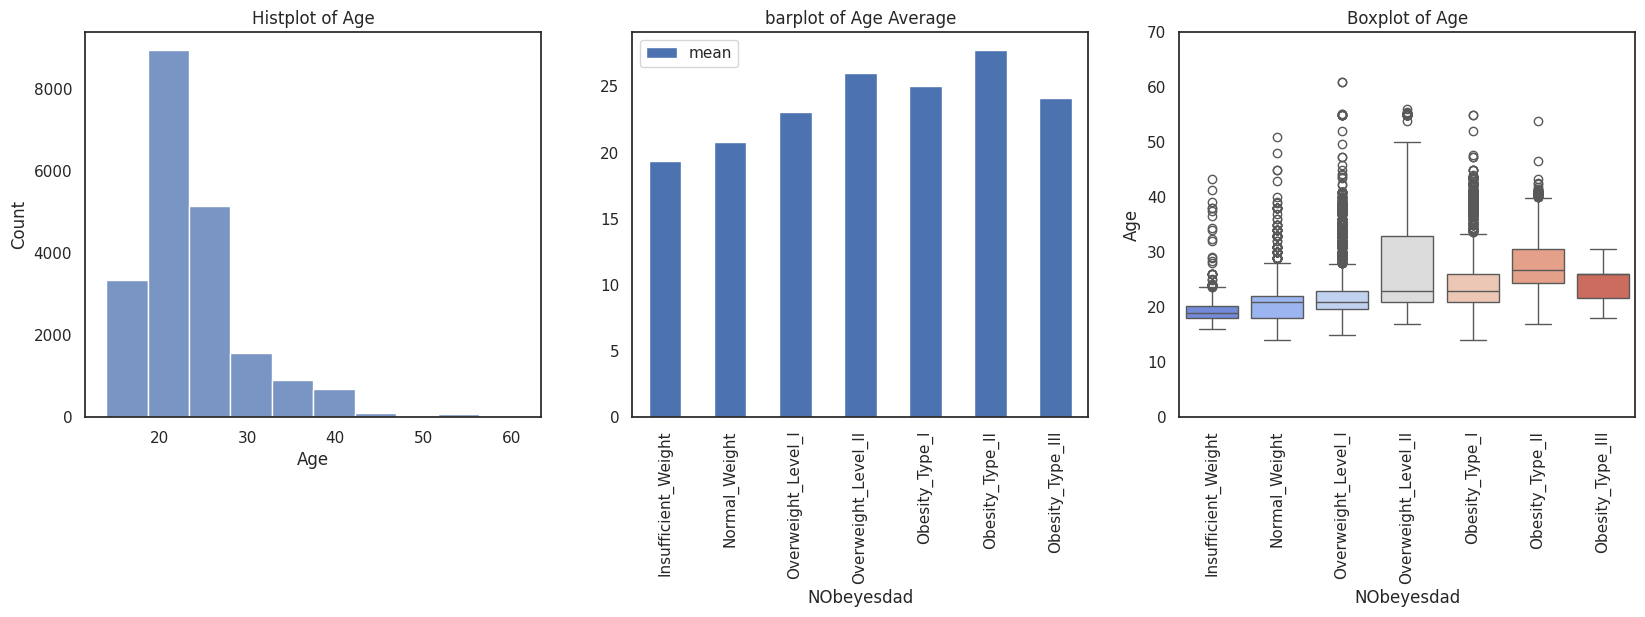

In [63]:
f,ax = plt.subplots(1,3, figsize = (20,5))
palette = sns.color_palette('coolwarm', 7)
sns.histplot(x= 'Age', data = df_train, bins = 10, palette = palette, ax = ax[0])
ax[0].set_title('Histplot of Age')
df_train.groupby('NObeyesdad')['Age'].agg(['mean']).reindex(order_list).plot(kind = 'bar', ax = ax[1])
ax[1].set_xticklabels(order_list, rotation=90)
ax[1].set_title('barplot of Age Average')
sns.boxplot(y= 'Age', x = 'NObeyesdad', data = df_train, order = order_list, palette = palette, ax = ax[2])
ax[2].set_xticklabels(order_list, rotation=90)
ax[2].set_ylim([0,70])
ax[2].set_title('Boxplot of Age')

**Observations:**
* The distribution of the Age feature is positively skewed, indicating that appropriate handling will be necessary during the Feature Engineering process.
* Looking at the average and median ages according to obesity levels, there is an increasing trend from Insufficient to Overweight_Level_II, with the ages of Insufficient_weight and normal_weight being lower compared to other obesity categories.
* These results show that age has an influence on overweight and obesity levels.

### **3.2.2 Height**

In [64]:
df_train['Height'].describe()

count    20758.000000
mean         1.700245
std          0.087312
min          1.450000
25%          1.631856
50%          1.700000
75%          1.762887
max          1.975663
Name: Height, dtype: float64

In [65]:
df_train.groupby('NObeyesdad')['Height'].agg(['mean','median']).reindex(order_list)

mean    median
NObeyesdad                             
Insufficient_Weight  1.683693  1.700000
Normal_Weight        1.670744  1.660000
Overweight_Level_I   1.686880  1.700000
Overweight_Level_II  1.706163  1.700000
Obesity_Type_I       1.693509  1.694805
Obesity_Type_II      1.782715  1.773506
Obesity_Type_III     1.676007  1.643421

Text(0.5, 1.0, 'Boxplot of Height')

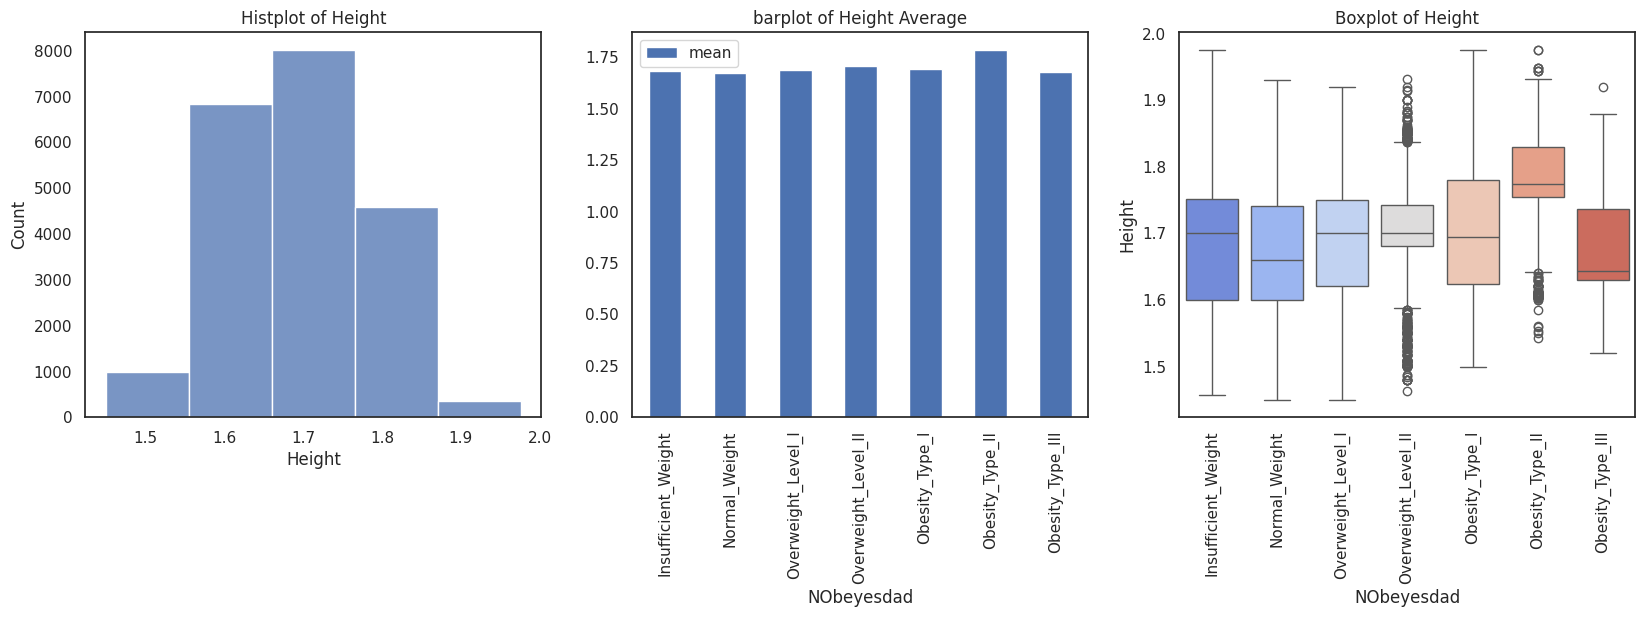

In [66]:
f,ax = plt.subplots(1,3, figsize = (20,5))
palette = sns.color_palette('coolwarm', 7)
sns.histplot(x= 'Height', data = df_train, bins = 5, palette = palette, ax = ax[0])
ax[0].set_title('Histplot of Height')
df_train.groupby('NObeyesdad')['Height'].agg(['mean']).reindex(order_list).plot(kind = 'bar', ax = ax[1])
ax[1].set_xticklabels(order_list, rotation=90)
ax[1].set_title('barplot of Height Average')
sns.boxplot(y= 'Height', x = 'NObeyesdad', data = df_train, order = order_list, palette = palette, ax = ax[2])
ax[2].set_xticklabels(order_list, rotation=90)
ax[2].set_title('Boxplot of Height')

**Observations:**
* The Height feature has a distribution close to normal.
* Since the distribution of Height according to obesity levels is similar, the correlation between Height and obesity levels appears to be low.

### **3.2.3 Weight**

In [67]:
df_train['Weight'].describe()

count    20758.000000
mean        87.887768
std         26.379443
min         39.000000
25%         66.000000
50%         84.064875
75%        111.600553
max        165.057269
Name: Weight, dtype: float64

In [68]:
df_train.groupby('NObeyesdad')['Weight'].agg(['mean','median']).reindex(order_list)

mean      median
NObeyesdad                                 
Insufficient_Weight   49.860773   50.000000
Normal_Weight         61.533289   60.000000
Overweight_Level_I    74.228266   75.000000
Overweight_Level_II   82.085513   81.627139
Obesity_Type_I        92.371026   90.116124
Obesity_Type_II      115.995914  118.332966
Obesity_Type_III     117.697452  111.914361

Text(0.5, 1.0, 'Boxplot of Weight')

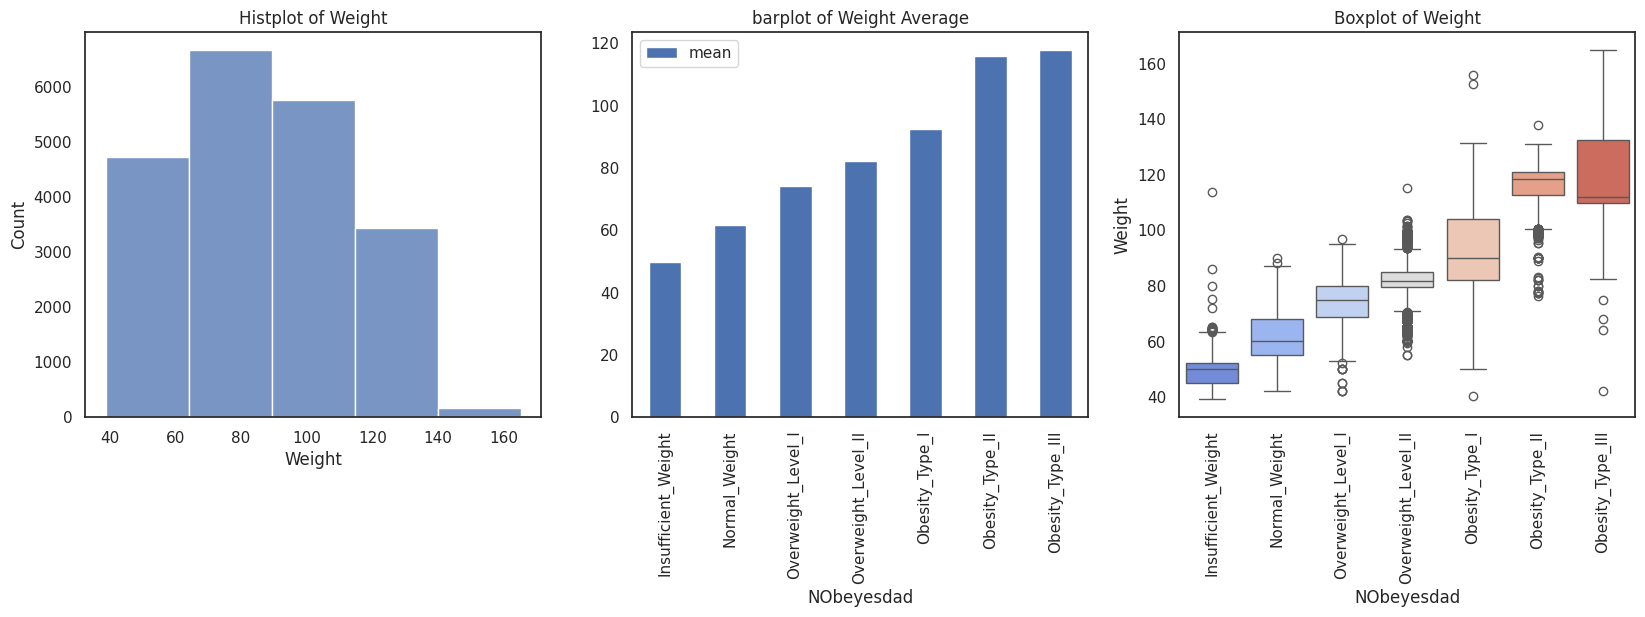

In [69]:
f,ax = plt.subplots(1,3, figsize = (20,5))
palette = sns.color_palette('coolwarm', 7)
sns.histplot(x= 'Weight', data = df_train, bins = 5, palette = palette, ax = ax[0])
ax[0].set_title('Histplot of Weight')
df_train.groupby('NObeyesdad')['Weight'].agg(['mean']).reindex(order_list).plot(kind = 'bar', ax = ax[1])
ax[1].set_xticklabels(order_list, rotation=90)
ax[1].set_title('barplot of Weight Average')
sns.boxplot(y= 'Weight', x = 'NObeyesdad', data = df_train, order = order_list, palette = palette, ax = ax[2])
ax[2].set_xticklabels(order_list, rotation=90)
ax[2].set_title('Boxplot of Weight')

**Observations:**
* As obesity levels increase, both the average and median values of the Weight feature tend to increase.
* These results indicate a trend where an increase in Weight is associated with an increase in obesity levels.

### **3.2.4 Height & Weight vs NObeyesdad**

In [71]:
df2 = df_train.copy()
df2['BMI'] = df2['Weight']/df2['Height']**2
df2.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad        BMI  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  28.259565  
1  1.000000         no             Automobile        Normal_Weight  23.422091  
2  1.673584         no  Public_Transportation  Insufficient_Weight  17.126706  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  44.855798  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II  25.599151

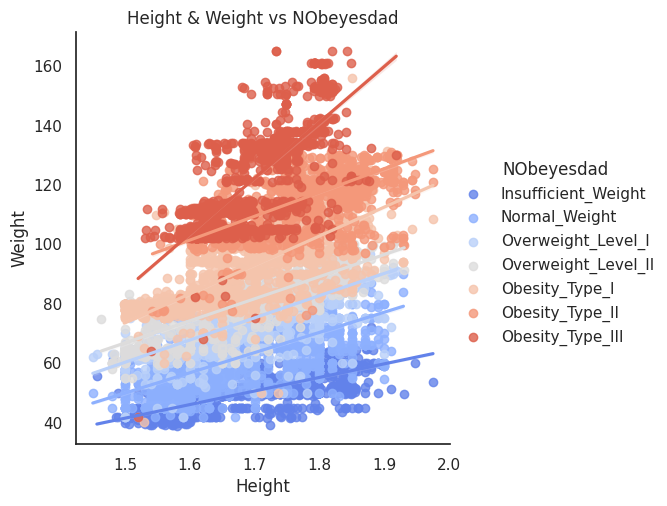

In [85]:
palette = sns.color_palette('coolwarm', 7)
sns.lmplot(x='Height', y='Weight', hue = 'NObeyesdad', data = df2, palette = palette, hue_order = order_list)
plt.title('Height & Weight vs NObeyesdad')
plt.show()

**BMI**: Body Mass Index =  (Weight)/(Height)**2

Text(0.5, 1.0, 'Boxplot of BMI')

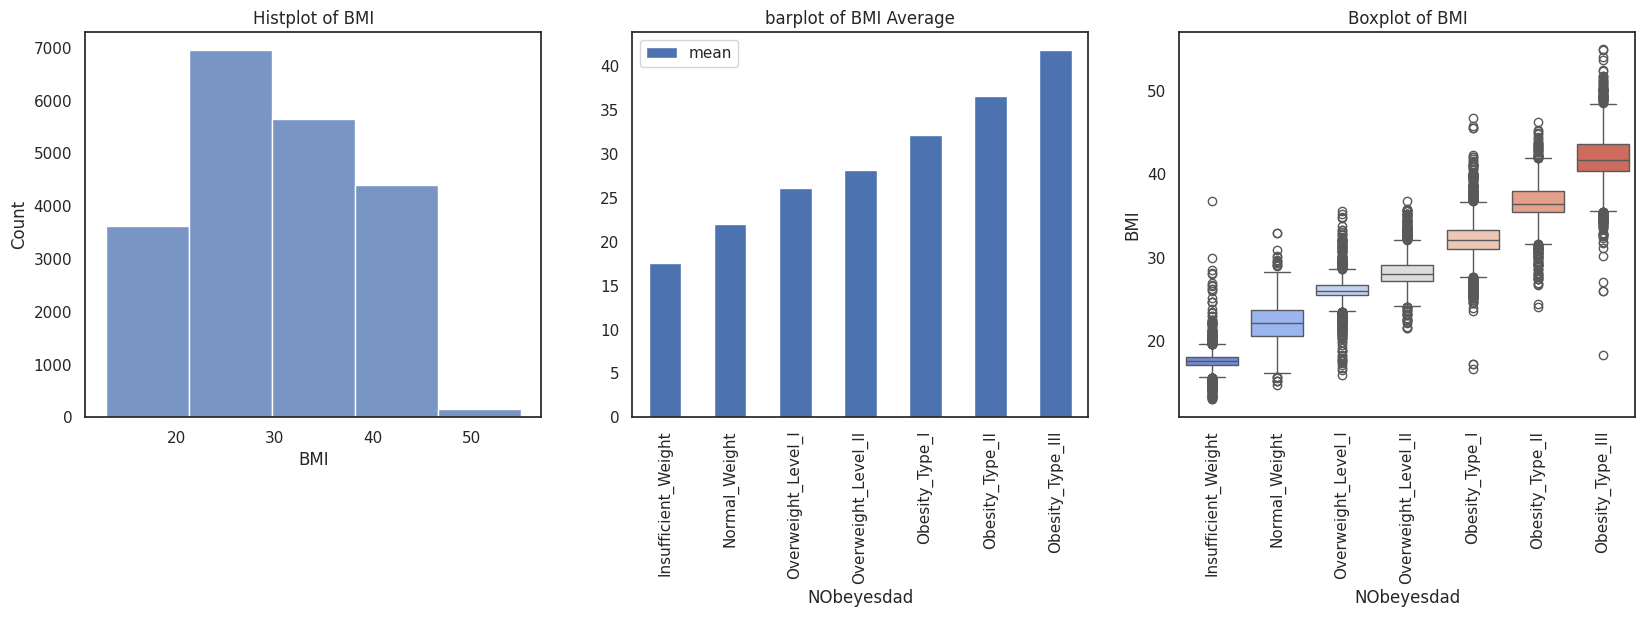

In [80]:
f,ax = plt.subplots(1,3, figsize = (20,5))
palette = sns.color_palette('coolwarm', 7)
sns.histplot(x= 'BMI', data = df2, bins = 5, palette = palette, ax = ax[0])
ax[0].set_title('Histplot of BMI')
df2.groupby('NObeyesdad')['BMI'].agg(['mean']).reindex(order_list).plot(kind = 'bar', ax = ax[1])
ax[1].set_xticklabels(order_list, rotation=90)
ax[1].set_title('barplot of BMI Average')
sns.boxplot(y= 'BMI', x = 'NObeyesdad', data = df2, order = order_list, palette = palette, ax = ax[2])
ax[2].set_xticklabels(order_list, rotation=90)
ax[2].set_title('Boxplot of BMI')

**Observations:**
* The correlation between height and weight shows that as height increases, weight tends to increase, and within the same height, weight increases as obesity levels increase.
* To clarify this, BMI was calculated. The distribution of BMI is concentrated in the range of 20-40, with the fewest people having an average BMI of 50.
* Observing the trend of BMI according to obesity levels, it is clear that BMI increases as obesity levels increase.

### **3.2.5 FCVC**

In [86]:
df_train['FCVC'].describe()

count    20758.000000
mean         2.445908
std          0.533218
min          1.000000
25%          2.000000
50%          2.393837
75%          3.000000
max          3.000000
Name: FCVC, dtype: float64

In [87]:
df_train.groupby('NObeyesdad')['FCVC'].agg(['mean','median']).reindex(order_list)

mean    median
NObeyesdad                             
Insufficient_Weight  2.479756  2.766320
Normal_Weight        2.372249  2.000000
Overweight_Level_I   2.256583  2.000000
Overweight_Level_II  2.224499  2.000000
Obesity_Type_I       2.097052  2.000000
Obesity_Type_II      2.425227  2.499388
Obesity_Type_III     3.000000  3.000000

Text(0.5, 1.0, 'Boxplot of FCVC')

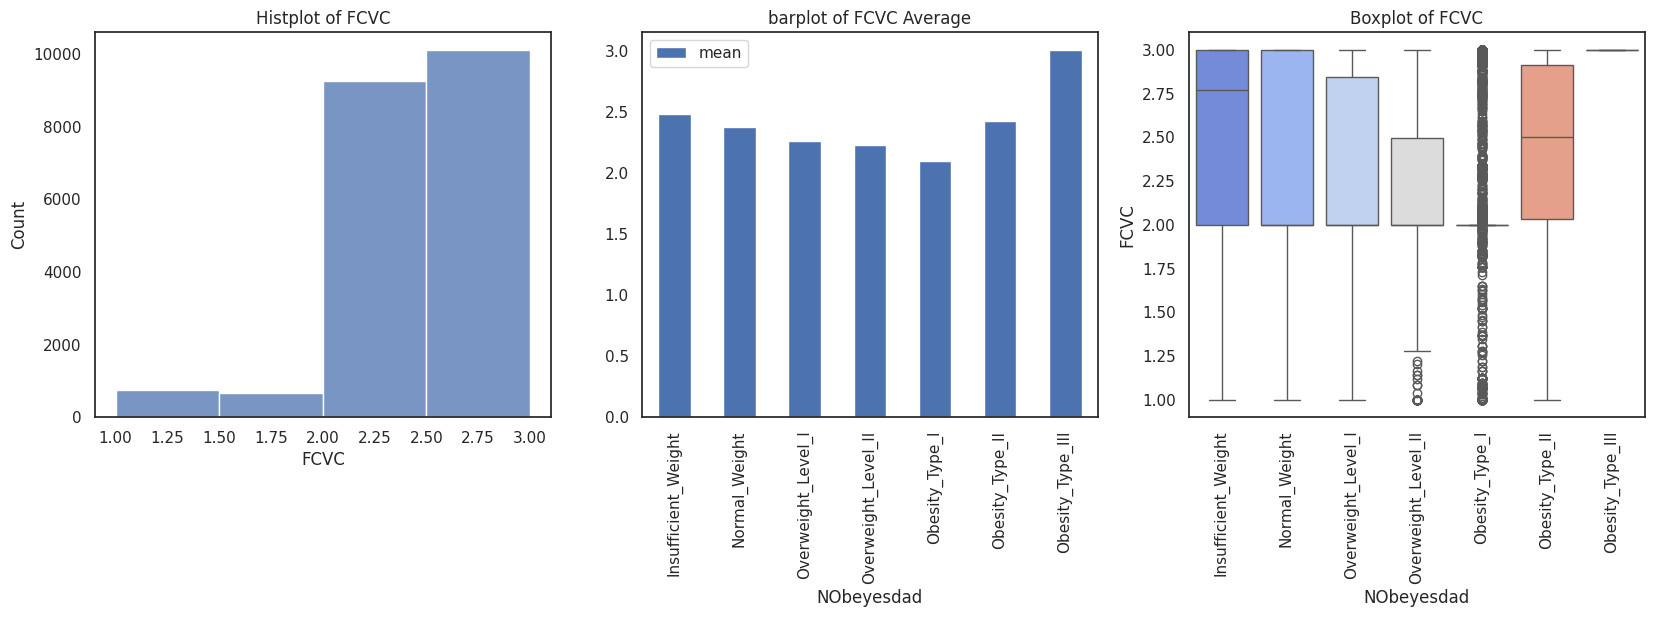

In [88]:
f,ax = plt.subplots(1,3, figsize = (20,5))
palette = sns.color_palette('coolwarm', 7)
sns.histplot(x= 'FCVC', data = df_train, bins = 4, palette = palette, ax = ax[0])
ax[0].set_title('Histplot of FCVC')
df_train.groupby('NObeyesdad')['FCVC'].agg(['mean']).reindex(order_list).plot(kind = 'bar', ax = ax[1])
ax[1].set_xticklabels(order_list, rotation=90)
ax[1].set_title('barplot of FCVC Average')
sns.boxplot(y= 'FCVC', x = 'NObeyesdad', data = df_train, order = order_list, palette = palette, ax = ax[2])
ax[2].set_xticklabels(order_list, rotation=90)
ax[2].set_title('Boxplot of FCVC')

**Observations:**
* The number of people increases as the value of the FCVC feature increases, with most people having a frequency of consuming vegetables during meals of more than 1.6.
* Up to the Obesity_1 category, there is a tendency for the frequency of eating vegetables during meals to decrease. However, from Obesity_II onwards, the frequency of consuming vegetables tends to increase again. It seems that simply consuming vegetables cannot be conclusively linked to lower obesity levels, indicating that other factors must also be considered in conjunction.

### **3.2.6 FCVC vs SCC**

In [89]:
df_train.groupby(['SCC'])['FCVC'].agg(['mean','median'])

mean    median
SCC                    
no   2.443726  2.382705
yes  2.509659  2.919584

Text(0.5, 1.0, 'Boxplot of FCVC')

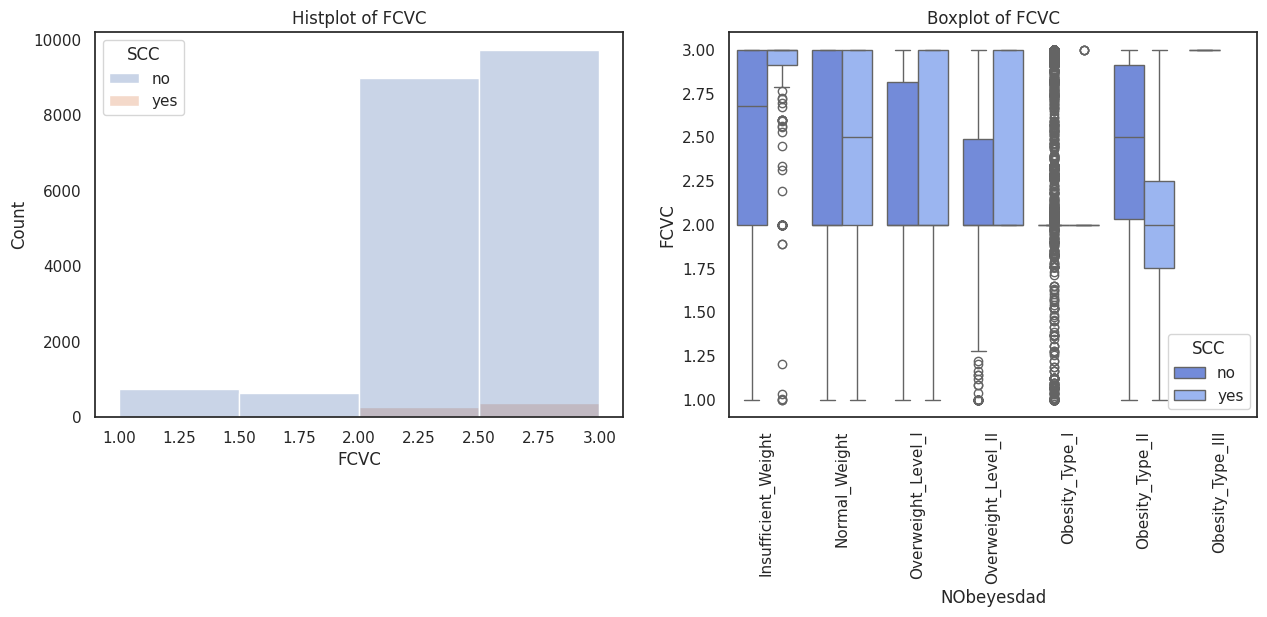

In [90]:
f,ax = plt.subplots(1,2, figsize = (15,5))
palette = sns.color_palette('coolwarm', 7)
sns.histplot(x= 'FCVC', hue = 'SCC',data = df_train, bins = 4,  alpha = 0.3, ax = ax[0])
ax[0].set_title('Histplot of FCVC')
sns.boxplot(y= 'FCVC', x = 'NObeyesdad', hue = 'SCC', data = df_train, order = order_list, palette = palette, ax = ax[1])
ax[1].set_xticklabels(order_list, rotation=90)
ax[1].set_title('Boxplot of FCVC')

**Observations:**
* It can be observed that individuals who monitor their calorie intake (SCC == yes) tend to consume vegetables more frequently than those who do not monitor. As a result, they generally appear to be positioned at lower obesity levels.

### **3.2.7 NCP**
**NCP**: How many main meals do you have daily?-numeric

In [91]:
df_train['NCP'].describe()

count    20758.000000
mean         2.761332
std          0.705375
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: NCP, dtype: float64

In [92]:
df_train.groupby('NObeyesdad')['NCP'].agg(['mean','median']).reindex(order_list)

mean  median
NObeyesdad                           
Insufficient_Weight  2.919554     3.0
Normal_Weight        2.889552     3.0
Overweight_Level_I   2.528178     3.0
Overweight_Level_II  2.594109     3.0
Obesity_Type_I       2.454551     3.0
Obesity_Type_II      2.798439     3.0
Obesity_Type_III     2.999950     3.0

Text(0.5, 1.0, 'Boxplot of NCP')

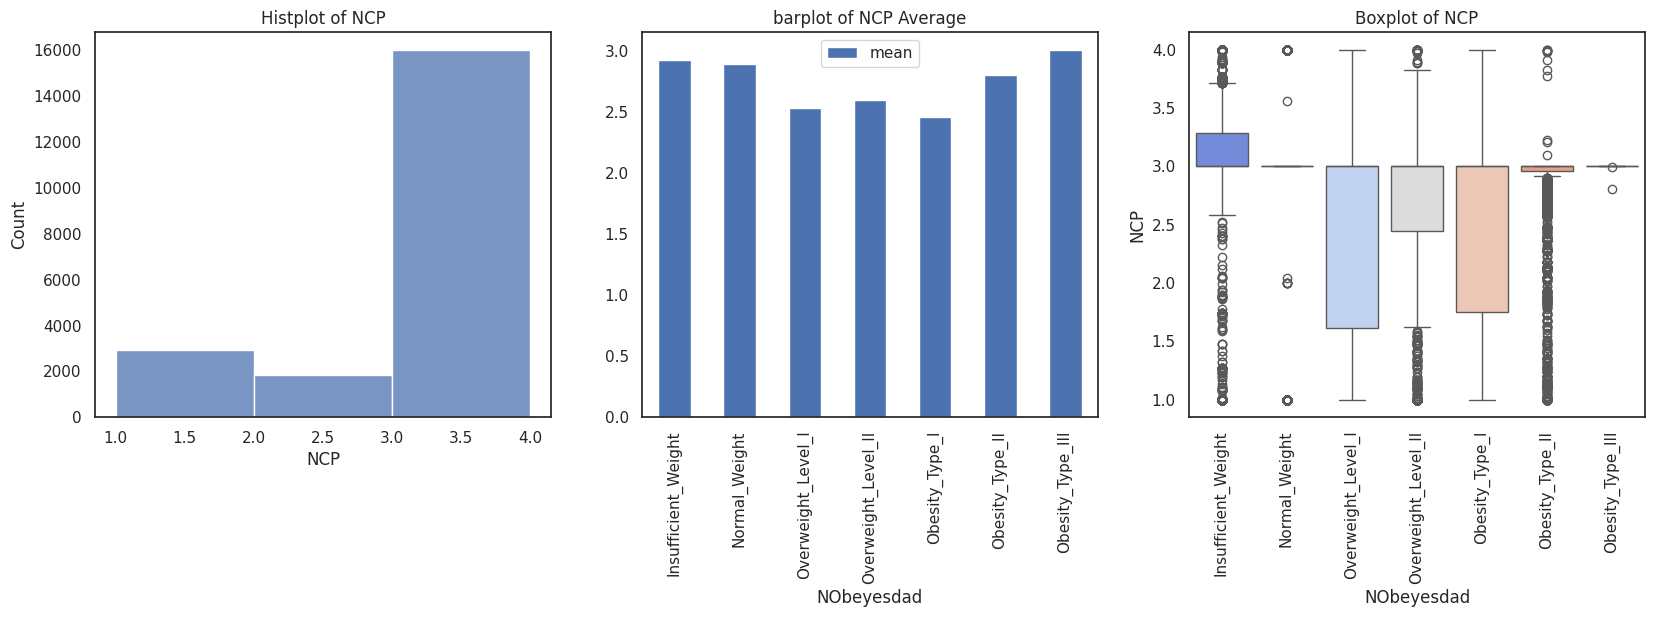

In [93]:
f,ax = plt.subplots(1,3, figsize = (20,5))
palette = sns.color_palette('coolwarm', 7)
sns.histplot(x= 'NCP', data = df_train, bins = 3, palette = palette, ax = ax[0])
ax[0].set_title('Histplot of NCP')
df_train.groupby('NObeyesdad')['NCP'].agg(['mean']).reindex(order_list).plot(kind = 'bar', ax = ax[1])
ax[1].set_xticklabels(order_list, rotation=90)
ax[1].set_title('barplot of NCP Average')
sns.boxplot(y= 'NCP', x = 'NObeyesdad', data = df_train, order = order_list, palette = palette, ax = ax[2])
ax[2].set_xticklabels(order_list, rotation=90)
ax[2].set_title('Boxplot of NCP')

**Observations:**
* Most people appear to have an average of 3.5 meals a day, followed by a significant number of individuals who have an average of 1.5 meal a day.
* On average, the number of meals per day is higher in the categories other than Overweight and Obesity_I.
* From the boxplot distribution of values for each category, while the median remains the same across all categories, the distribution of values for the Overweight and Obesity_I categories tends to be lower compared to the other categories, consistent with the trend in averages.

### **3.2.8 CH2O**
**CH2O**: How much water do you drink daily?-numeric

In [94]:
df_train['CH2O'].describe()

count    20758.000000
mean         2.029418
std          0.608467
min          1.000000
25%          1.792022
50%          2.000000
75%          2.549617
max          3.000000
Name: CH2O, dtype: float64

In [95]:
df_train.groupby('NObeyesdad')['CH2O'].agg(['mean','median']).reindex(order_list)

mean    median
NObeyesdad                             
Insufficient_Weight  1.744163  2.000000
Normal_Weight        1.806204  2.000000
Overweight_Level_I   2.069366  2.000000
Overweight_Level_II  2.004470  2.000000
Obesity_Type_I       2.129783  2.000000
Obesity_Type_II      1.985064  2.014592
Obesity_Type_III     2.332338  2.618198

Text(0.5, 1.0, 'Boxplot of CH2O')

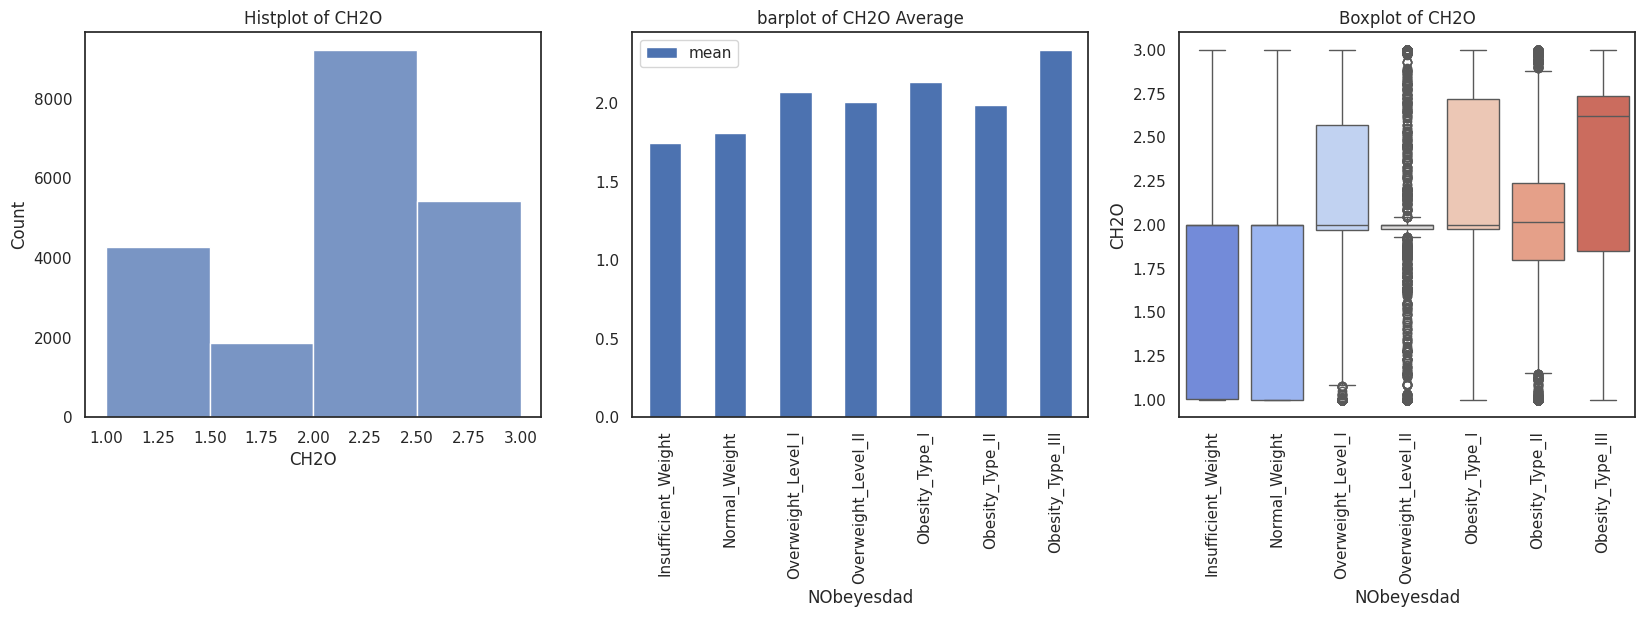

In [96]:
f,ax = plt.subplots(1,3, figsize = (20,5))
palette = sns.color_palette('coolwarm', 7)
sns.histplot(x= 'CH2O', data = df_train, bins = 4, palette = palette, ax = ax[0])
ax[0].set_title('Histplot of CH2O')
df_train.groupby('NObeyesdad')['CH2O'].agg(['mean']).reindex(order_list).plot(kind = 'bar', ax = ax[1])
ax[1].set_xticklabels(order_list, rotation=90)
ax[1].set_title('barplot of CH2O Average')
sns.boxplot(y= 'CH2O', x = 'NObeyesdad', data = df_train, order = order_list, palette = palette, ax = ax[2])
ax[2].set_xticklabels(order_list, rotation=90)
ax[2].set_title('Boxplot of CH2O')

**Observations:**
* On average, people who drink more than 2 glasses of water per day outnumber those who do not.
* The trend in averages shows that as obesity levels increase, the frequency of water consumption tends to increase as well.
* Looking at the distribution of CH2O values according to obesity categories, the distribution of CH2O values in the Overweight and Obesity categories is higher compared to the distribution of CH2O values in the insufficient_weight and normal_weight categories.
* On average, the frequency of water consumption per day appears to have a significant correlation with obesity levels.

### **3.2.9 FAF**
**FAF**: How often do you have physical activity?-numeric

In [97]:
df_train['FAF'].describe()

count    20758.000000
mean         0.981747
std          0.838302
min          0.000000
25%          0.008013
50%          1.000000
75%          1.587406
max          3.000000
Name: FAF, dtype: float64

In [98]:
df_train.groupby('NObeyesdad')['FAF'].agg(['mean','median']).reindex(order_list)

mean    median
NObeyesdad                             
Insufficient_Weight  1.201782  1.000000
Normal_Weight        1.189580  1.000000
Overweight_Level_I   1.134657  1.000000
Overweight_Level_II  1.060895  1.000000
Obesity_Type_I       0.922710  1.000000
Obesity_Type_II      1.029579  1.000000
Obesity_Type_III     0.549225  0.035091

Text(0.5, 1.0, 'Boxplot of FAF')

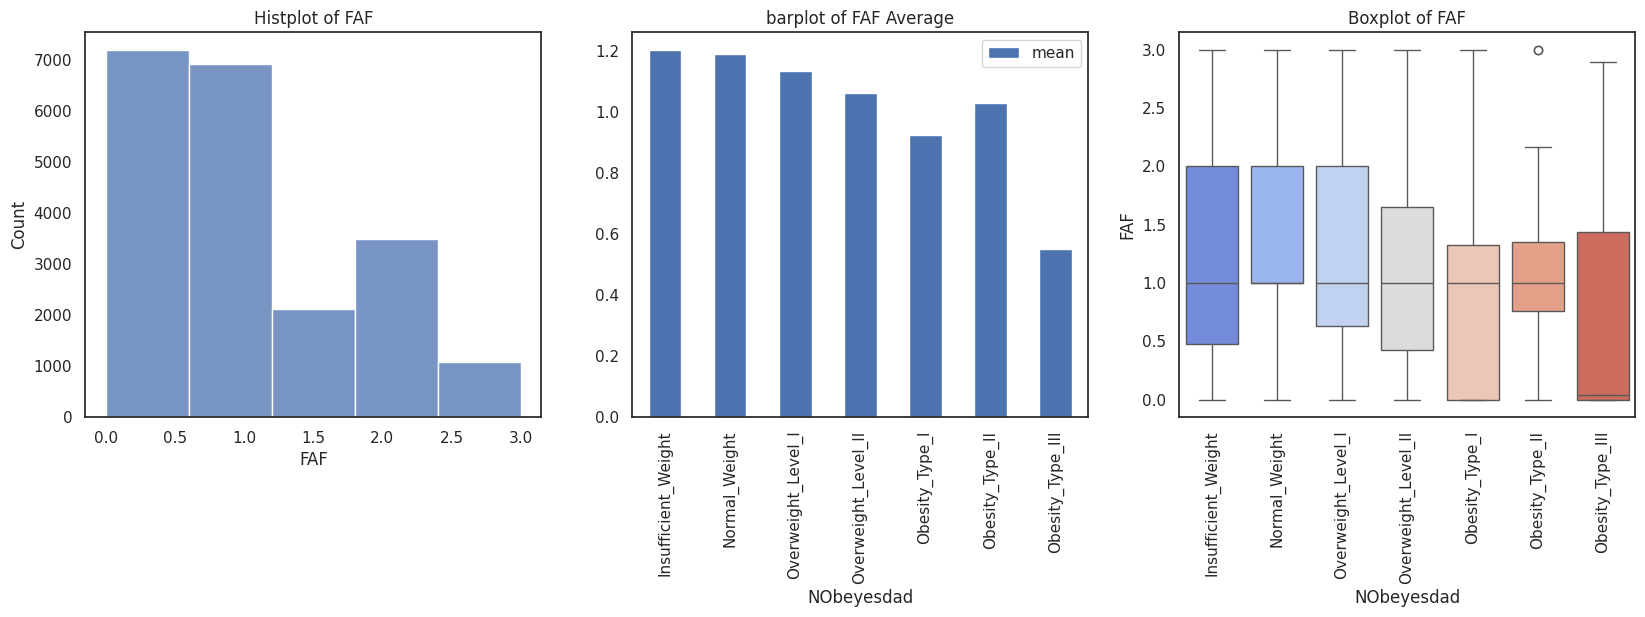

In [99]:
f,ax = plt.subplots(1,3, figsize = (20,5))
palette = sns.color_palette('coolwarm', 7)
sns.histplot(x= 'FAF', data = df_train, bins = 5, palette = palette, ax = ax[0])
ax[0].set_title('Histplot of FAF')
df_train.groupby('NObeyesdad')['FAF'].agg(['mean']).reindex(order_list).plot(kind = 'bar', ax = ax[1])
ax[1].set_xticklabels(order_list, rotation=90)
ax[1].set_title('barplot of FAF Average')
sns.boxplot(y= 'FAF', x = 'NObeyesdad', data = df_train, order = order_list, palette = palette, ax = ax[2])
ax[2].set_xticklabels(order_list, rotation=90)
ax[2].set_title('Boxplot of FAF')

**Observations:**
* The number of data points for FAF (Physical Activity Frequency) tends to decrease as the values increase. This indicates that there are more people engaging in little physical activity than those who are more active.
* Looking at the trend of FAF according to obesity levels, both the average and median values decrease as obesity levels increase. This suggests that lower levels of physical activity may contribute to higher obesity levels.

### **3.2.10 TUE**
**TUE**: How much time do you use technological devices such as cell phone, videogames, television, computer and others?-numeric

In [129]:
df_train['TUE'].describe()

count    20758.000000
mean         0.616756
std          0.602113
min          0.000000
25%          0.000000
50%          0.573887
75%          1.000000
max          2.000000
Name: TUE, dtype: float64

In [100]:
df_train.groupby('NObeyesdad')['TUE'].agg(['mean','median']).reindex(order_list)

mean    median
NObeyesdad                             
Insufficient_Weight  0.802901  1.000000
Normal_Weight        0.630216  1.000000
Overweight_Level_I   0.557014  0.133566
Overweight_Level_II  0.697984  0.930051
Obesity_Type_I       0.739477  0.666305
Obesity_Type_II      0.415601  0.091538
Obesity_Type_III     0.548849  0.561632

Text(0.5, 1.0, 'Boxplot of TUE')

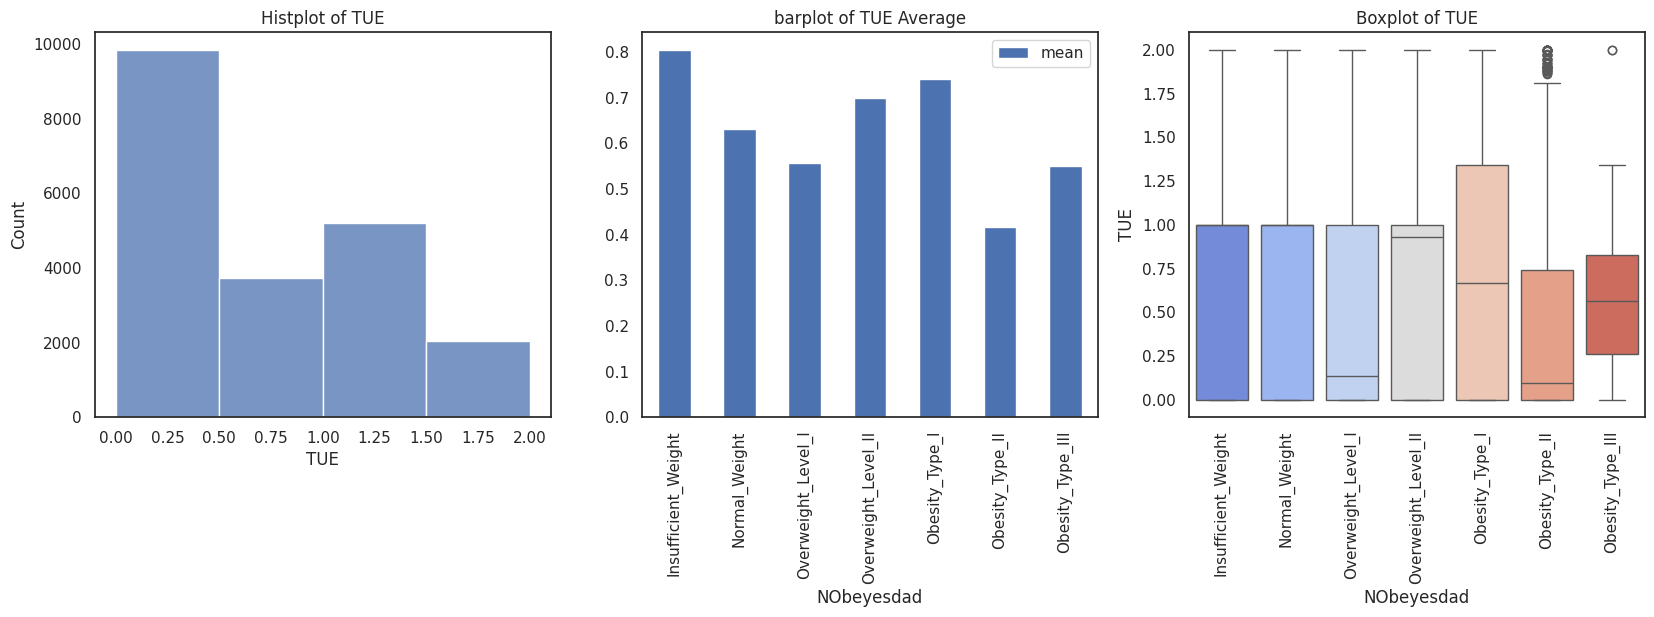

In [101]:
f,ax = plt.subplots(1,3, figsize = (20,5))
palette = sns.color_palette('coolwarm', 7)
sns.histplot(x= 'TUE', data = df_train, bins = 4, palette = palette, ax = ax[0])
ax[0].set_title('Histplot of TUE')
df_train.groupby('NObeyesdad')['TUE'].agg(['mean']).reindex(order_list).plot(kind = 'bar', ax = ax[1])
ax[1].set_xticklabels(order_list, rotation=90)
ax[1].set_title('barplot of TUE Average')
sns.boxplot(y= 'TUE', x = 'NObeyesdad', data = df_train, order = order_list, palette = palette, ax = ax[2])
ax[2].set_xticklabels(order_list, rotation=90)
ax[2].set_title('Boxplot of TUE')

**Observations:**
* The trend for TUE (Time Using Electronics) shows a tendency for the number of people to decrease as the values increase. There are fewer people spending more than 0.5 hours using electronic devices compared to those who spend less time.
* Within the obesity categories (Not Obesity, Overweight, Obesity), there is a tendency for TUE to decrease as obesity levels increase. However, within the same category, as obesity levels rise, both the average and median values of TUE tend to increase.

## **3.3 Summary**

### **Categorical Features Summary**

- **NObeyesdad**: Classified as an ordinal feature with seven categories ranging from Insufficient_Weight to Obesity_Type_III, indicating levels of obesity. The distribution across categories is balanced, eliminating concerns of imbalance.

- **Gender**: The distribution between male and female participants is nearly equal, with gender differences observed in the distribution of obesity levels, suggesting an influence of gender-specific lifestyle and dietary habits.

- **family_history_with_overweight**: Indicates a higher prevalence of obesity in individuals with a family history of overweight, suggesting genetic or familial lifestyle influences on obesity levels.

- **FAVC**: Shows a correlation between frequent high-calorie food consumption and higher obesity levels, highlighting the impact of dietary choices on obesity.

- **CAEC**: The "sometimes" category dominates, with a varied distribution of obesity levels across categories, suggesting that the frequency of eating between meals has a complex relationship with obesity levels.

- **SMOKE**: Dominated by non-smokers, with no significant difference in obesity levels between smokers and non-smokers, suggesting smoking status may not be a critical factor in obesity.

- **SCC**: Individuals monitoring their calorie intake tend to have lower obesity levels, emphasizing the importance of calorie management in obesity prevention.

- **FAVC & CAEC vs SCC**: Highlights the influence of calorie monitoring on the consumption of high-calorie foods and the frequency of eating between meals, underscoring the importance of dietary awareness.

- **CALC**: Indicates a complex relationship between alcohol consumption frequency and obesity levels, with some trends deviating from expectations due to possible data limitations.

- **MTRANS**: Reveals a relationship between transportation mode and obesity levels, with higher obesity rates observed in individuals using automobiles and public transportation compared to active modes of transport.

### **Numeric Features Summary**

- **Age**: Shows a positively skewed distribution, with age influencing obesity levels, suggesting the need for careful handling during feature engineering.

- **Height**: Distribution is close to normal, with a low correlation between height and obesity levels, indicating height may not significantly influence obesity status.

- **Weight**: Exhibits a clear trend of increasing average and median values with rising obesity levels, confirming weight as a strong indicator of obesity.

- **Height & Weight vs NObeyesdad**: Correlation analysis and BMI calculation reveal a direct relationship between BMI and obesity levels, highlighting the utility of BMI in obesity assessment.

- **FCVC**: Suggests that vegetable consumption frequency does not directly correlate with lower obesity levels, indicating the complexity of diet-obesity relationships.

- **FCVC vs SCC**: People who monitor their calorie intake tend to consume vegetables more frequently and have lower obesity levels, supporting the role of dietary awareness.

- **NCP**: The average number of meals per day varies across obesity categories, with no clear trend indicating the influence of meal frequency on obesity levels.

- **CH2O**: Higher water consumption is associated with higher obesity levels, suggesting a correlation but requiring further investigation for causal relationships.

- **FAF**: Indicates a decrease in physical activity frequency with increasing obesity levels, underscoring the importance of physical activity in managing obesity.

- **TUE**: Shows a complex relationship between time spent using electronics and obesity levels, with some indications of higher electronic usage in higher obesity categories.

# **4. Feature Engineering**

In [291]:
df2 = df_train.copy()
df2 = df2.drop('id', axis = 1)
df2.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

## **4.1 Categorical Features**


### **4.1.1 NObeyesdad**

In [292]:
df2['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [293]:
NObeyesdad_map = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}
df2['NObeyesdad_num'] = df2['NObeyesdad'].map(lambda x: NObeyesdad_map.get(x, x))
df2 = df2.drop('NObeyesdad', axis = 1)

### **4.1.2 Gender**

In [294]:
df2['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [295]:
Gender_map = {'Male': 0, 'Female': 1}
df2['Gender_num'] = df2['Gender'].map(lambda x: Gender_map.get(x, x))
df2 = df2.drop('Gender', axis = 1)

### **4.1.3 family_history_with_overweight**

In [296]:
df2['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [297]:
yes_no_map = {'yes': 0, 'no': 1}
df2['family_history_with_overweight_num'] = df2['family_history_with_overweight'].map(lambda x: yes_no_map.get(x, x))
df2 = df2.drop('family_history_with_overweight', axis = 1)

### **4.1.4 FAVC**

In [298]:
df2['FAVC'].unique()

array(['yes', 'no'], dtype=object)

In [299]:
df2['FAVC_num'] = df2['FAVC'].map(lambda x: yes_no_map.get(x, x))
df2 = df2.drop('FAVC', axis = 1)

### **4.1.5 CAEC**

In [300]:
df2['CAEC'].unique()

array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object)

In [301]:
CAEC_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df2['CAEC_num'] = df2['CAEC'].map(lambda x: CAEC_map.get(x, x))
df2 = df2.drop('CAEC', axis = 1)

### **4.1.6 SMOKE**

In [302]:
df2['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [303]:
df2['SMOKE_num'] = df2['SMOKE'].map(lambda x: yes_no_map.get(x, x))
df2 = df2.drop('SMOKE', axis = 1)

### **4.1.7 SCC**

In [304]:
df2['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [305]:
df2['SCC_num'] = df2['SCC'].map(lambda x: yes_no_map.get(x, x))
df2 = df2.drop('SCC', axis = 1)

### **4.1.8 CALC**

In [306]:
df2['CALC'].unique()

array(['Sometimes', 'no', 'Frequently'], dtype=object)

In [307]:
CALC_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df2['CALC_num'] = df2['CALC'].map(lambda x: CALC_map.get(x, x))
df2 = df2.drop('CALC', axis = 1)

### **4.1.9 MTRANS**

* As observed in the EDA section, Walking, Motorbike, and Bike categories show lower numbers compared to other categories. Creating many categories with small numbers can degrade model performance.
* The obesity ratios for Walking, Motorbike, and Bike show similar obesity trends. Therefore, combining these three categories is expected to help in terms of model performance.

In [308]:
df2['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [309]:
MTRANS_map = {'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Motorbike': 2, 'Bike': 2}
df2['MTRANS_num'] = df2['MTRANS'].map(lambda x: MTRANS_map.get(x, x))
df2 = df2.drop('MTRANS', axis = 1)

## **4.2 Numerical Features**


### **4.2.1 BMI**

In [310]:
df2['BMI'] = df2['Weight']/df2['Height']**2
df2.head()

Age    Height      Weight      FCVC       NCP      CH2O       FAF  \
0  24.443011  1.699998   81.669950  2.000000  2.983297  2.763573  0.000000   
1  18.000000  1.560000   57.000000  2.000000  3.000000  2.000000  1.000000   
2  18.000000  1.711460   50.165754  1.880534  1.411685  1.910378  0.866045   
3  20.952737  1.710730  131.274851  3.000000  3.000000  1.674061  1.467863   
4  31.641081  1.914186   93.798055  2.679664  1.971472  1.979848  1.967973   

        TUE  NObeyesdad_num  Gender_num  family_history_with_overweight_num  \
0  0.976473               3           0                                   0   
1  1.000000               1           1                                   0   
2  1.673584               0           1                                   0   
3  0.780199               6           1                                   0   
4  0.931721               3           0                                   0   

   FAVC_num  CAEC_num  SMOKE_num  SCC_num  CALC_num  MTRANS_num        BMI  
0         0         1          1        1         1           0  28.259565  
1         0         2          1        1         0           1  23.422091  
2         0         1          1        1         0           0  17.126706  
3         0         1          1        1         1           0  44.855798  
4         0         1          1        1         1           0  25.599151

## **4.3 Test data**

In [357]:
df_test2 = df_test.copy()

In [359]:
# id
df_test2= df_test2.drop('id', axis = 1)

# Gender
df_test2['Gender_num'] = df_test2['Gender'].map(lambda x: Gender_map.get(x, x))
df_test2 = df_test2.drop('Gender', axis = 1)

# family_history_with_overweight
df_test2['family_history_with_overweight_num'] = df_test2['family_history_with_overweight'].map(lambda x: yes_no_map.get(x, x))
df_test2 = df_test2.drop('family_history_with_overweight', axis = 1)

# FAVC
df_test2['FAVC_num'] = df_test2['FAVC'].map(lambda x: yes_no_map.get(x, x))
df_test2 = df_test2.drop('FAVC', axis = 1)

# CAEC
df_test2['CAEC_num'] = df_test2['CAEC'].map(lambda x: CAEC_map.get(x, x))
df_test2 = df_test2.drop('CAEC', axis = 1)

# SMOKE
df_test2['SMOKE_num'] = df_test2['SMOKE'].map(lambda x: yes_no_map.get(x, x))
df_test2 = df_test2.drop('SMOKE', axis = 1)

# SCC
df_test2['SCC_num'] = df_test2['SCC'].map(lambda x: yes_no_map.get(x, x))
df_test2 = df_test2.drop('SCC', axis = 1)

# CALC
df_test2['CALC_num'] = df_test2['CALC'].map(lambda x: CALC_map.get(x, x))
df_test2 = df_test2.drop('CALC', axis = 1)

# MTRANS
df_test2['MTRANS_num'] = df_test2['MTRANS'].map(lambda x: MTRANS_map.get(x, x))
df_test2 = df_test2.drop('MTRANS', axis = 1)

# BMI
df_test2['BMI'] = df_test2['Weight']/df_test2['Height']**2
df_test2.head()

Age    Height      Weight      FCVC       NCP      CH2O       FAF  \
0  26.899886  1.848294  120.644178  2.938616  3.000000  2.825629  0.855400   
1  21.000000  1.600000   66.000000  2.000000  1.000000  3.000000  1.000000   
2  26.000000  1.643355  111.600553  3.000000  3.000000  2.621877  0.000000   
3  20.979254  1.553127  103.669116  2.000000  2.977909  2.786417  0.094851   
4  26.000000  1.627396  104.835346  3.000000  3.000000  2.653531  0.000000   

        TUE  Gender_num  family_history_with_overweight_num  FAVC_num  \
0  0.000000           0                                   0         0   
1  0.000000           1                                   0         0   
2  0.250502           1                                   0         0   
3  0.000000           0                                   0         0   
4  0.741069           1                                   0         0   

   CAEC_num  SMOKE_num  SCC_num  CALC_num  MTRANS_num        BMI  
0         1          1        1         1           0  35.315411  
1         1          1        1         1           0  25.781250  
2         1          1        1         1           0  41.324115  
3         1          1        1         1           0  42.976937  
4         1          1        1         1           0  39.584143

# **5. Modeling**

In [263]:
!pip install catboost

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

Since the test data does not have a target label, the training data is split into train and test sets before proceeding with modeling.

In [265]:
y = df2['NObeyesdad_num']
X = df2.drop('NObeyesdad_num', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (16606, 17)
X_test: (4152, 17)
y_train: (16606,)
y_test: (4152,)


## **5.1. Simple Modeling**


In [325]:
simple_model =['DecisionTreeClassifier', 'AdaBoostClassifier', 'XGBoost', 'CatBoost']
simple_acc = []

In [326]:
# DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train,y_train)
pred = dtc.predict(X_test)
simple_acc.append(round(accuracy_score(y_test, pred),4))
print(f'Accuracy Score of DecisionTreeClassifier: {round(accuracy_score(y_test, pred),4)}')

Accuracy Score of DecisionTreeClassifier: 0.8492


In [327]:
# AdaBoostClassifier
dt_ada = DecisionTreeClassifier(random_state = 0)
ada = AdaBoostClassifier(dt_ada, random_state = 0)
ada.fit(X_train,y_train)
pred = ada.predict(X_test)
simple_acc.append(round(accuracy_score(y_test, pred),4))
print(f'Accuracy Score of AdaBoostClassifier: {round(accuracy_score(y_test, pred),4)}')

Accuracy Score of AdaBoostClassifier: 0.8442


In [328]:
# XGBoost
xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)
simple_acc.append(round(accuracy_score(y_test, pred),4))
print(f'Accuracy Score of XGBoost: {round(accuracy_score(y_test, pred),4)}')

Accuracy Score of XGBoost: 0.9075


In [329]:
# CatBoost
cb = CatBoostClassifier(random_state = 0, verbose = 0)
cb.fit(X_train,y_train)
pred = cb.predict(X_test)
simple_acc.append(round(accuracy_score(y_test, pred),4))
print(f'Accuracy Score of CatBoost: {round(accuracy_score(y_test, pred),4)}')

Accuracy Score of CatBoost: 0.9094


In [330]:
df_simple = pd.DataFrame({'Model': simple_model, 'Accuracy Score': simple_acc})
df_simple

Model  Accuracy Score
0  DecisionTreeClassifier          0.8492
1      AdaBoostClassifier          0.8442
2                 XGBoost          0.9075
3                CatBoost          0.9094

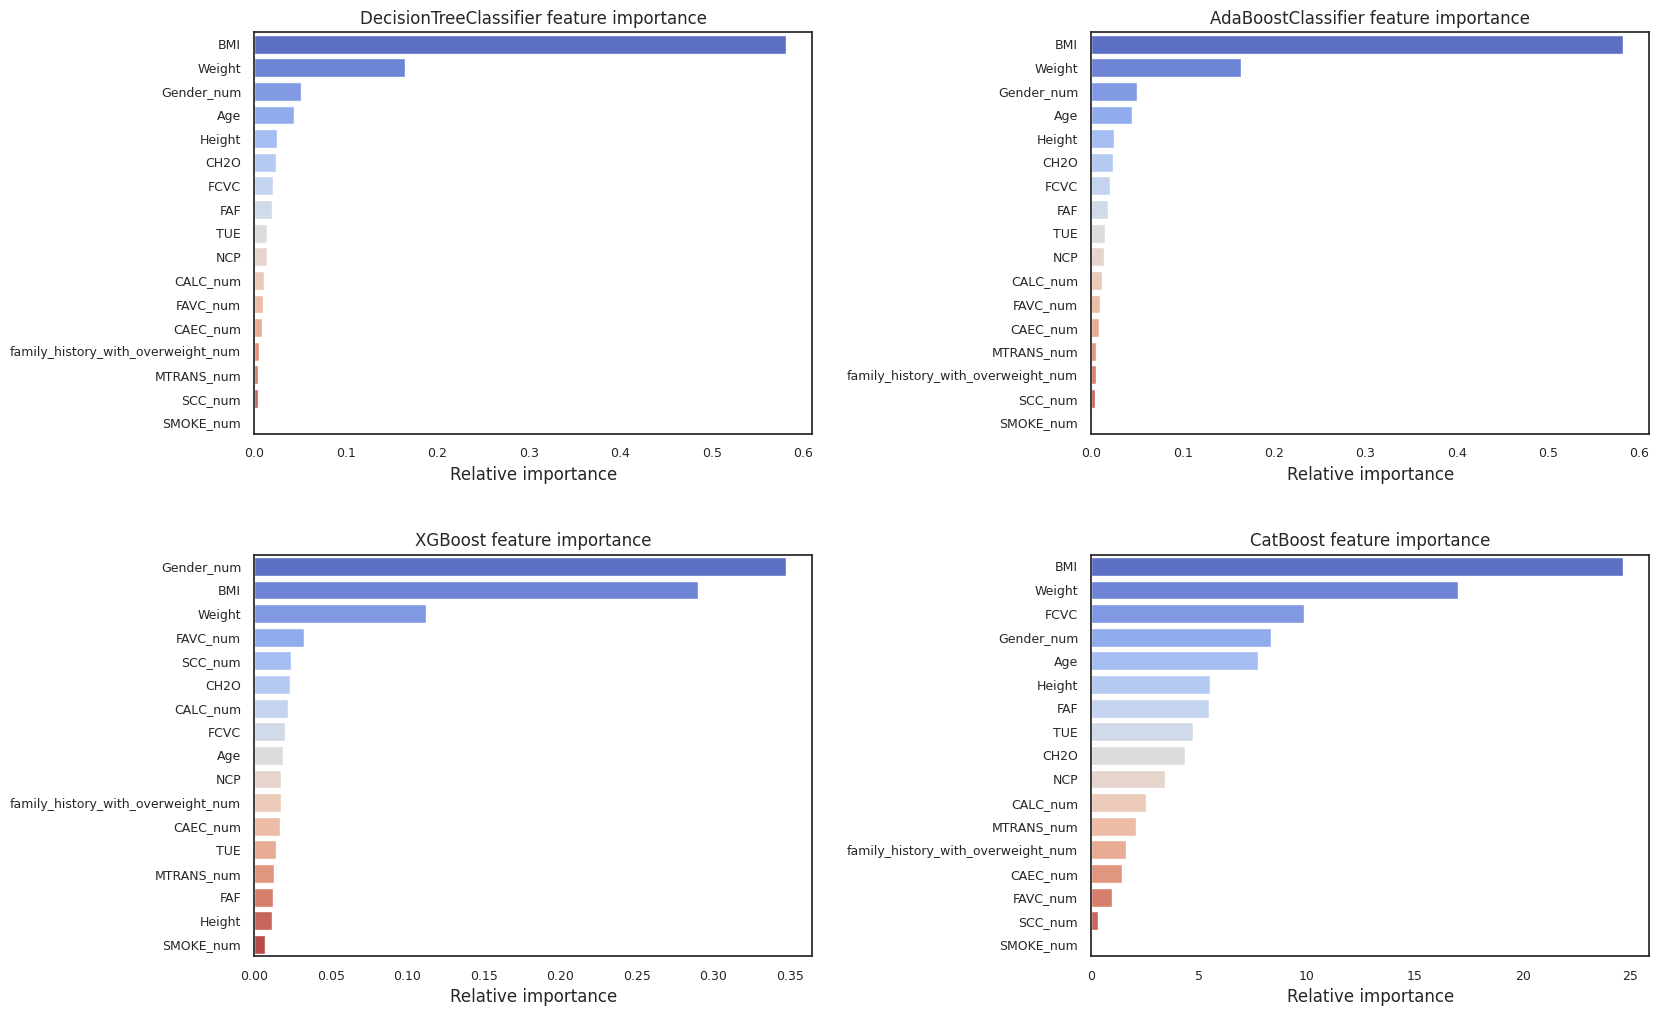

In [331]:
# feature importance
feature_names = X_train.columns
palette = sns.color_palette('coolwarm', 17)
names_classifiers = [("DecisionTreeClassifier", dtc),("AdaBoostClassifier",ada),("XGBoost",xgb),("CatBoost",cb)]
f,ax = plt.subplots(2,2, figsize=(18,12))

i = 0
for row in range(2):
    for col in range(2):
        name = names_classifiers[i][0]
        classifier = names_classifiers[i][1]
        indices = np.argsort(classifier.feature_importances_)[::-1]
        g = sns.barplot(y=X_train.columns[indices],x = classifier.feature_importances_[indices], orient='h', palette = palette, ax=ax[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("")
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        i += 1

plt.subplots_adjust(wspace = 0.5, hspace = 0.3)
plt.show()

**Summary:**
* There are differences in the feature importance trends among models.
    - DecisionTree, AdaBoost, and XGBoost, despite slight differences in order, have BMI, Weight, and gender as the primary top 3 features of importance. In contrast, CatBoost shows the order of feature importance as BMI, Weight, FCVC, Gender.
* Although there are differences between each model, the features commonly associated with a high correlation to obesity are BMI, Weight, and Gender.

## **5.2. Hyperparameter Tuning**
To improve model performance, there is an intention to tune the hyperparameters of XGBoost and CatBoost, which performed well in simple modeling.

In [371]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

kfold = StratifiedKFold(n_splits=3)

# XGBoost
xgb_params_grid = {
                   'n_estimators' : [500,600,700],
                   'learning_rate' : [0.1, 0.5, 1.0],
                   'max_depth' : [4, 5, 6]
                   }

xgb = XGBClassifier(random_state = 0)
GSxgb = GridSearchCV(xgb, param_grid = xgb_params_grid, scoring='accuracy', cv = kfold ,n_jobs= 4 , verbose = 0)
GSxgb.fit(X_train, y_train)

## Optimum Model
xgb_best = GSxgb.best_estimator_
pred = xgb_best.predict(X_test)
## Accuracy Score & f1 Score
print(f'Accuracy Score of XGBoost: {round(accuracy_score(y_test, pred),4)}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Accuracy Score of XGBoost: 0.9111


In [373]:
cb_params_grid = {
                  'iterations': [500,600,700],
                  'depth': [4, 5, 6],
                  'learning_rate' : [0.1, 0.5, 1.0]
                  }

cb = CatBoostClassifier(random_state = 0, verbose = 0)
GScb = GridSearchCV(cb, param_grid = cb_params_grid, scoring='accuracy', cv = kfold, n_jobs= 4 , verbose = 0)
GScb.fit(X_train, y_train)

## Optimum Model
cb_best = GScb.best_estimator_
pred = cb_best.predict(X_test)
## Accuracy Score & f1 Score
print(f'Accuracy Score of XGBoost: {round(accuracy_score(y_test, pred),4)}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Accuracy Score of XGBoost: 0.9102


# **6. Prediction**

In [337]:
df_submission = pd.read_csv('sample_submission.csv')

In [377]:
pred = xgb_best.predict(df_test2)
NObeyesdad_inv_map = {0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'}
df_submission['NObeyesdad'] = pred
df_submission['NObeyesdad'] = df_submission['NObeyesdad'].map(lambda x: NObeyesdad_inv_map.get(x, x))
df_submission.head()

id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [378]:
df_submission.to_csv('submission.csv', index=False)

This is my first participation in a competition. I have diligently applied what I have studied. I would greatly appreciate any advice, and an upvote would be wonderful too!! :)